# Classifying Breast Cancer Data

Matt Fox, Michael Mannino, Kaleb Schmucki, Neha Shijo

# Imports

In [1]:
# Math and statistics
import pandas as pd
import numpy as np

# Utility functions
from src.utils import *
import json

# Graphing and visualizations
import seaborn

seaborn.set_theme()

# Removes Jupyter notebook warnings (Optional)
import warnings

warnings.filterwarnings('ignore')

# Introduction

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer can occur in women and rarely in men. Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple, and changes in the shape or texture of the nipple or breast. The treatment of breast cancer depends on the stage of cancer. It may consist of chemotherapy, radiation, and surgery. About 1 in 8 U.S. women (about 12%) will develop invasive breast cancer over the course of her lifetime; it is the most commonly diagnosed cancer among American women besides skin cancer. Given these horrific statistics and the terrible disease’s affect the loved ones of our group members, the goal of this project is to compare and contrast various models to be able to predict breast cancer severity in women.

# Data Cleaning

Before analysis can be accurately made, we will standardize our data. Standardization is done by subtracting each data feature from the feature’s mean and dividing by the feature’s standard deviation. After this computation, each feature will have a mean of 0 and a standard deviation of 1.

In [2]:
# Read data from CSV into dataframe
df = pd.read_csv('data/wdbc.data', sep=',')

df

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
# Convert diagnosis from M (malignant), B (benign) to 1 (malignant), 0 (benign)
df['diagnosis'] = list(map(lambda x: int(x == 'M'), df['diagnosis']))

# Drop id column
df = df.drop('id', axis=1)

# Mean center and standardize all columns except diagnosis
for column in df.columns[1:]:
    df[column] = df[column].apply(lambda x : (x - df[column].mean()) / df[column].std())

In [4]:
df.describe()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.311195e-16,6.243785e-17,-1.123881e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,2.497514e-17,-4.995028e-17,1.748260e-16,4.838933e-16
std,0.483918,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00
25%,0.000000,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01
50%,0.000000,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01
75%,1.000000,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01
max,1.000000,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00


Our data has been officially standardized, as seen above.

In [5]:
# adding another version of the data which classifies Malignant as True and Benign as False
df_bool = df.copy()
d = {'M':True, 'B':False}
df_bool = df.replace(d)

For our references, let us plot the breakdown between number of benign and malignant datapoints:

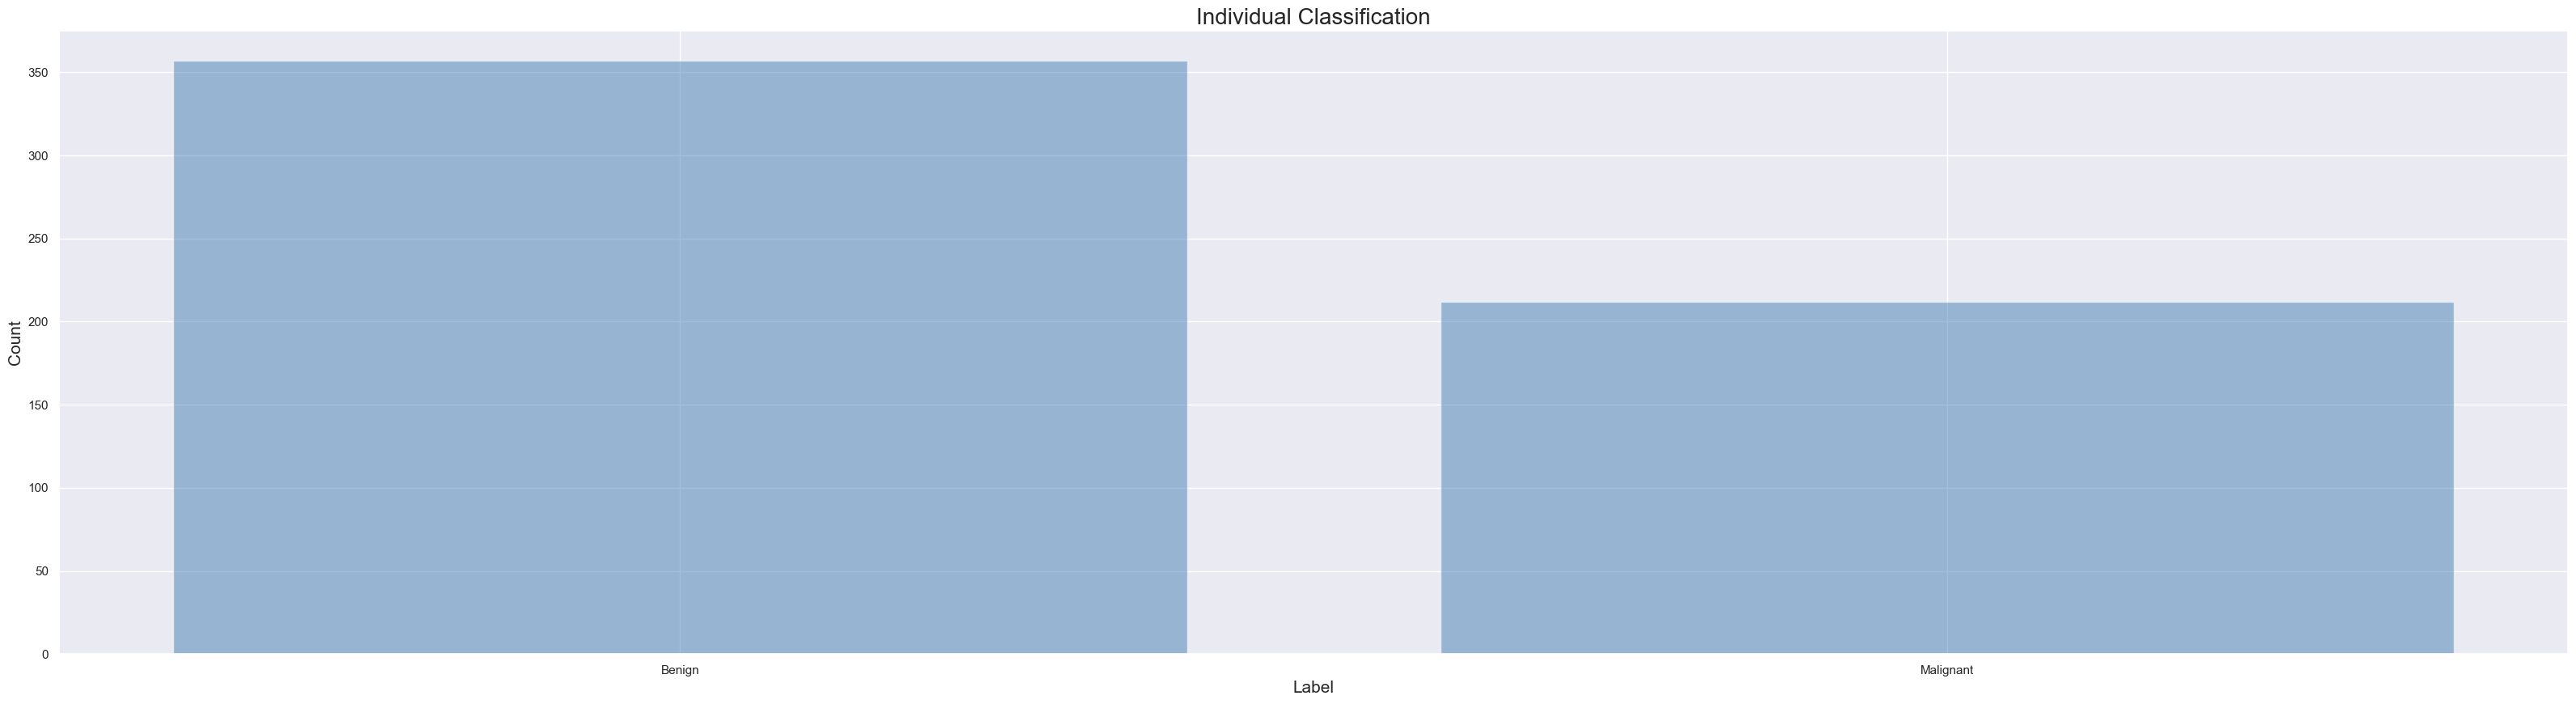

In [35]:
# Plot number of begign vs malignant tumors
plot_bar(df, 'diagnosis', ['Benign', 'Malignant'], 'Individual Classification', 'Label', 'Count')

# Bayes

The first classifier we will be exploring is the Naive Bayes Classifier, a probabilistic classifier based on assuming features are independent and utilizes Bayes Theorem. This classifier is slightly different from the rest of the classifiers we will be exploring throughout this report in that it is required to know the underlying distribution of the data in order to classify; thus, we began by fitting 3 distributions to each of the features: the normal, gamma, and beta distributions.

As mentioned above, because we standardized our data, reducing the mean to 0 and variance to 1, utilizing the SciPy probability density function fitting tools made this an incredibly easy task. Below we will explore fitting all three distributions to each of the features of both the combined, malignant, and benign distributions:

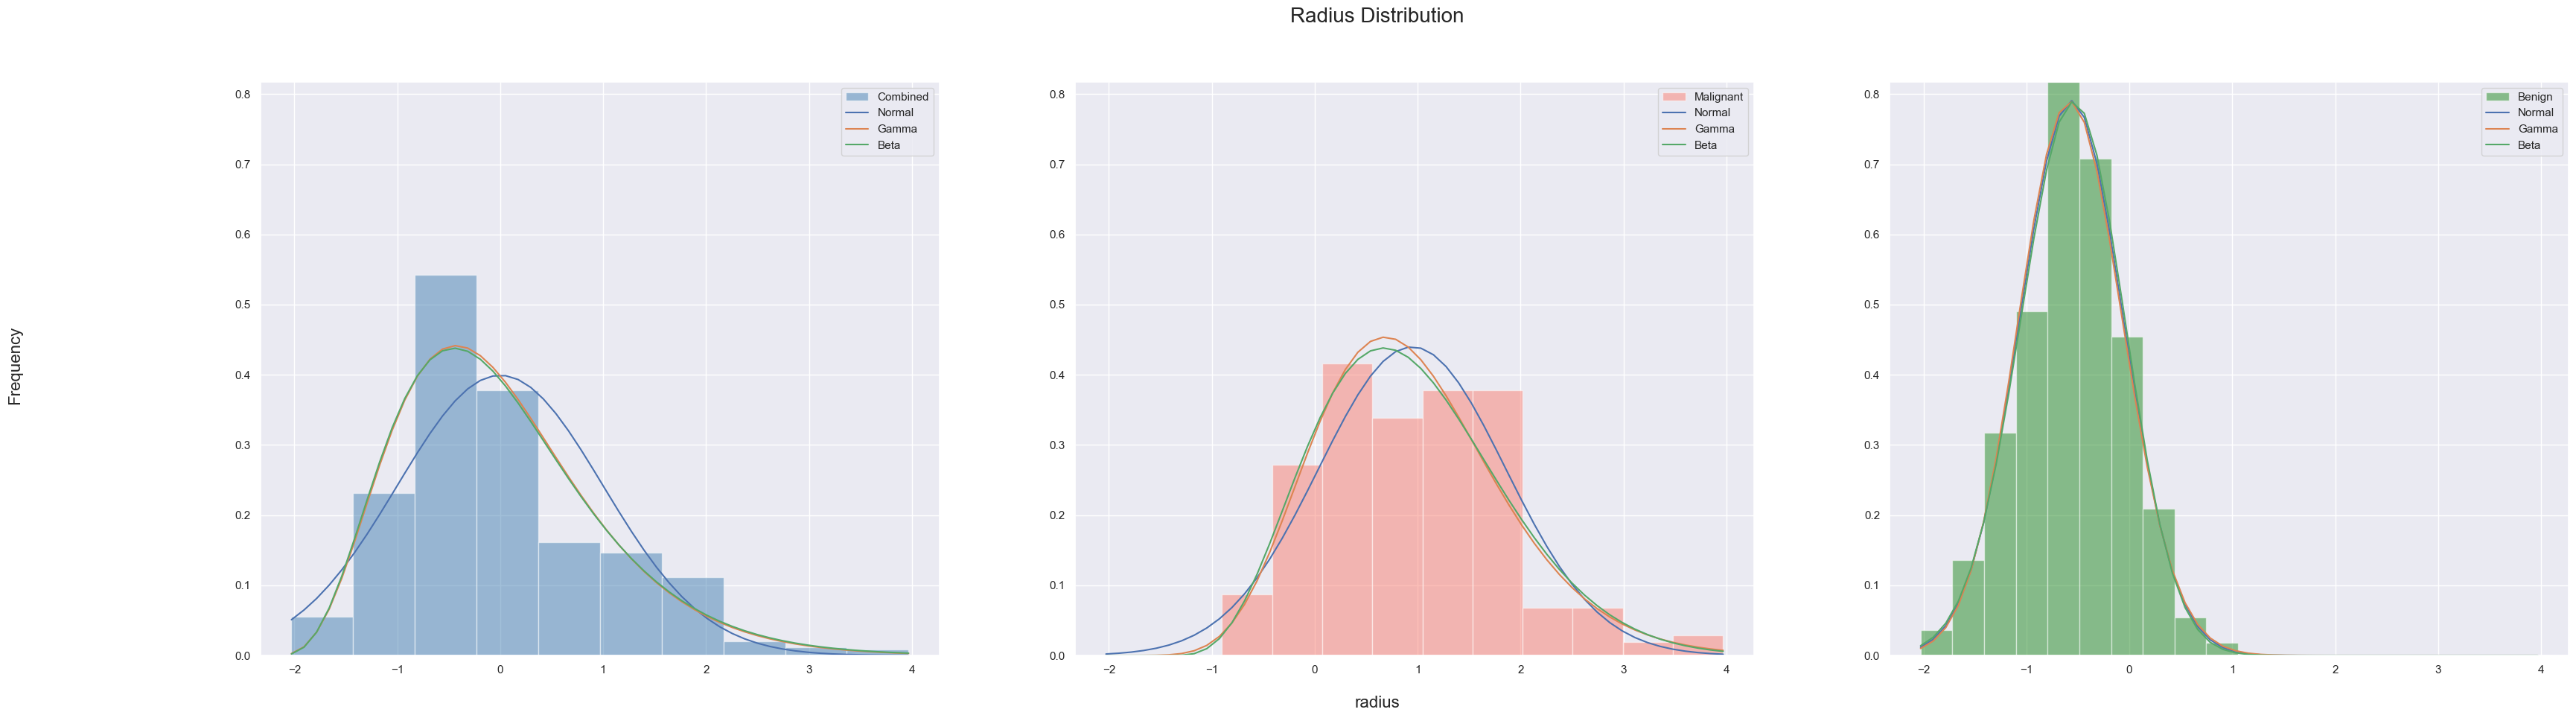

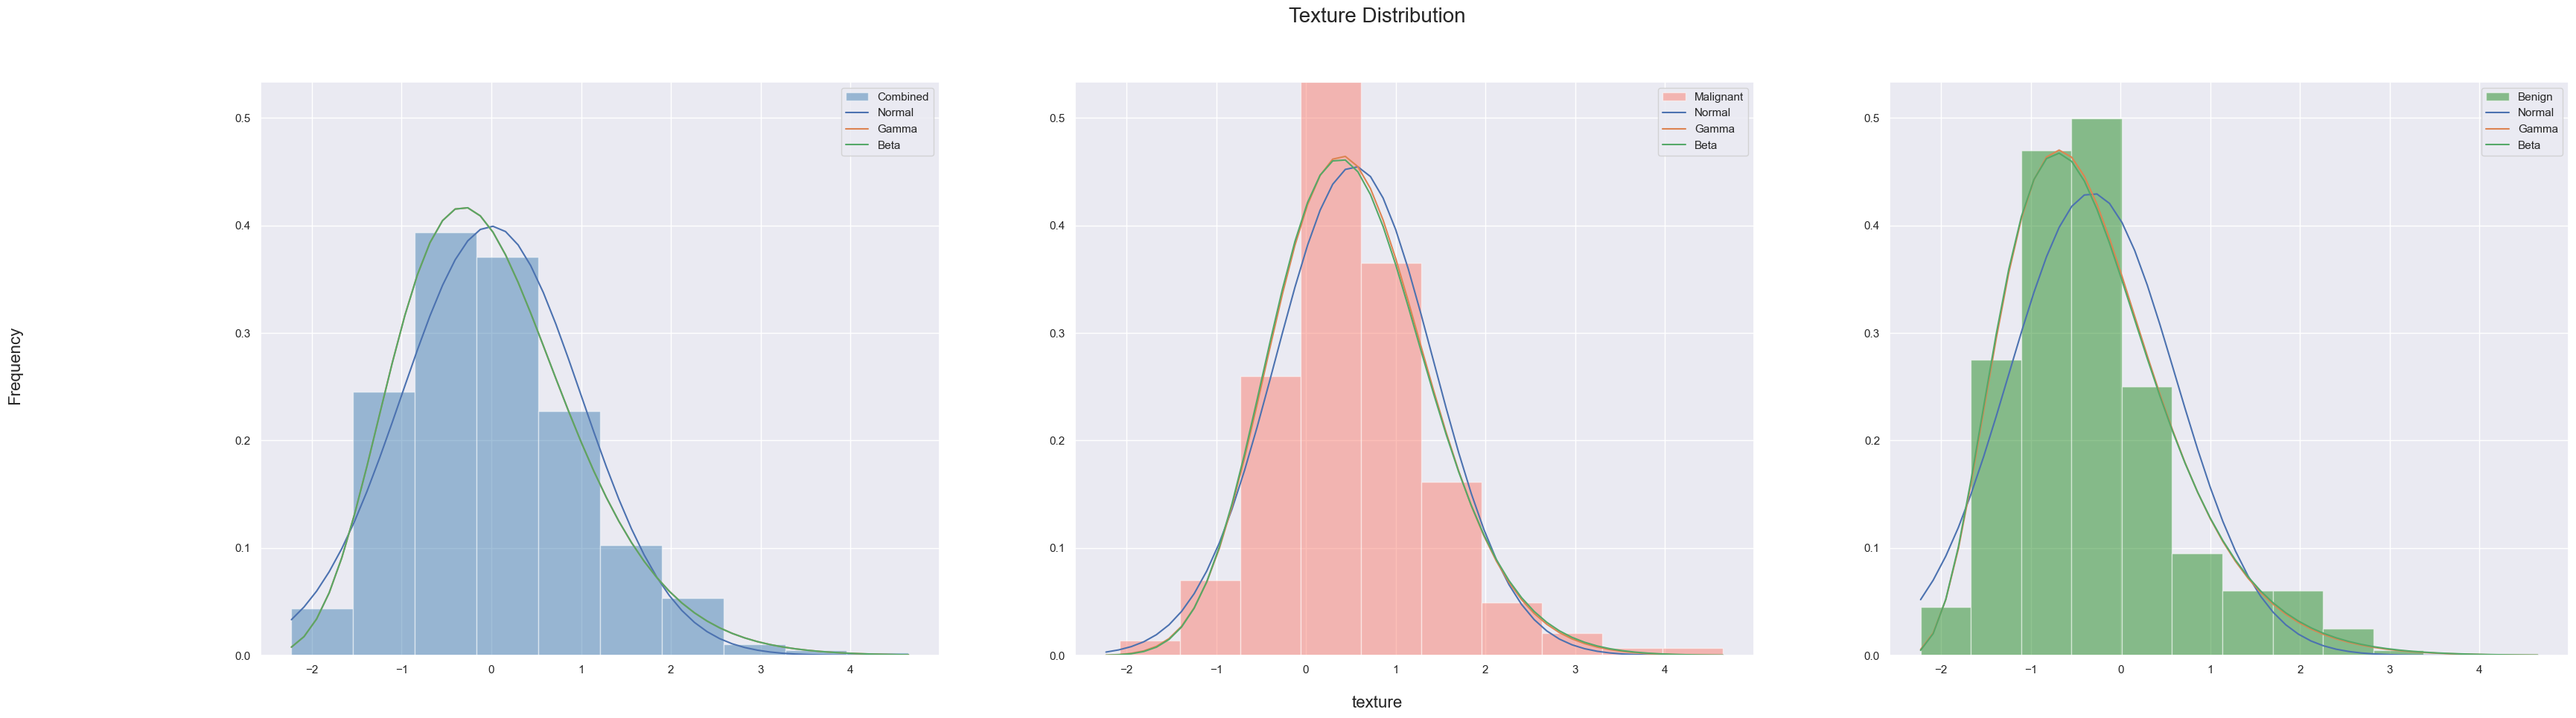

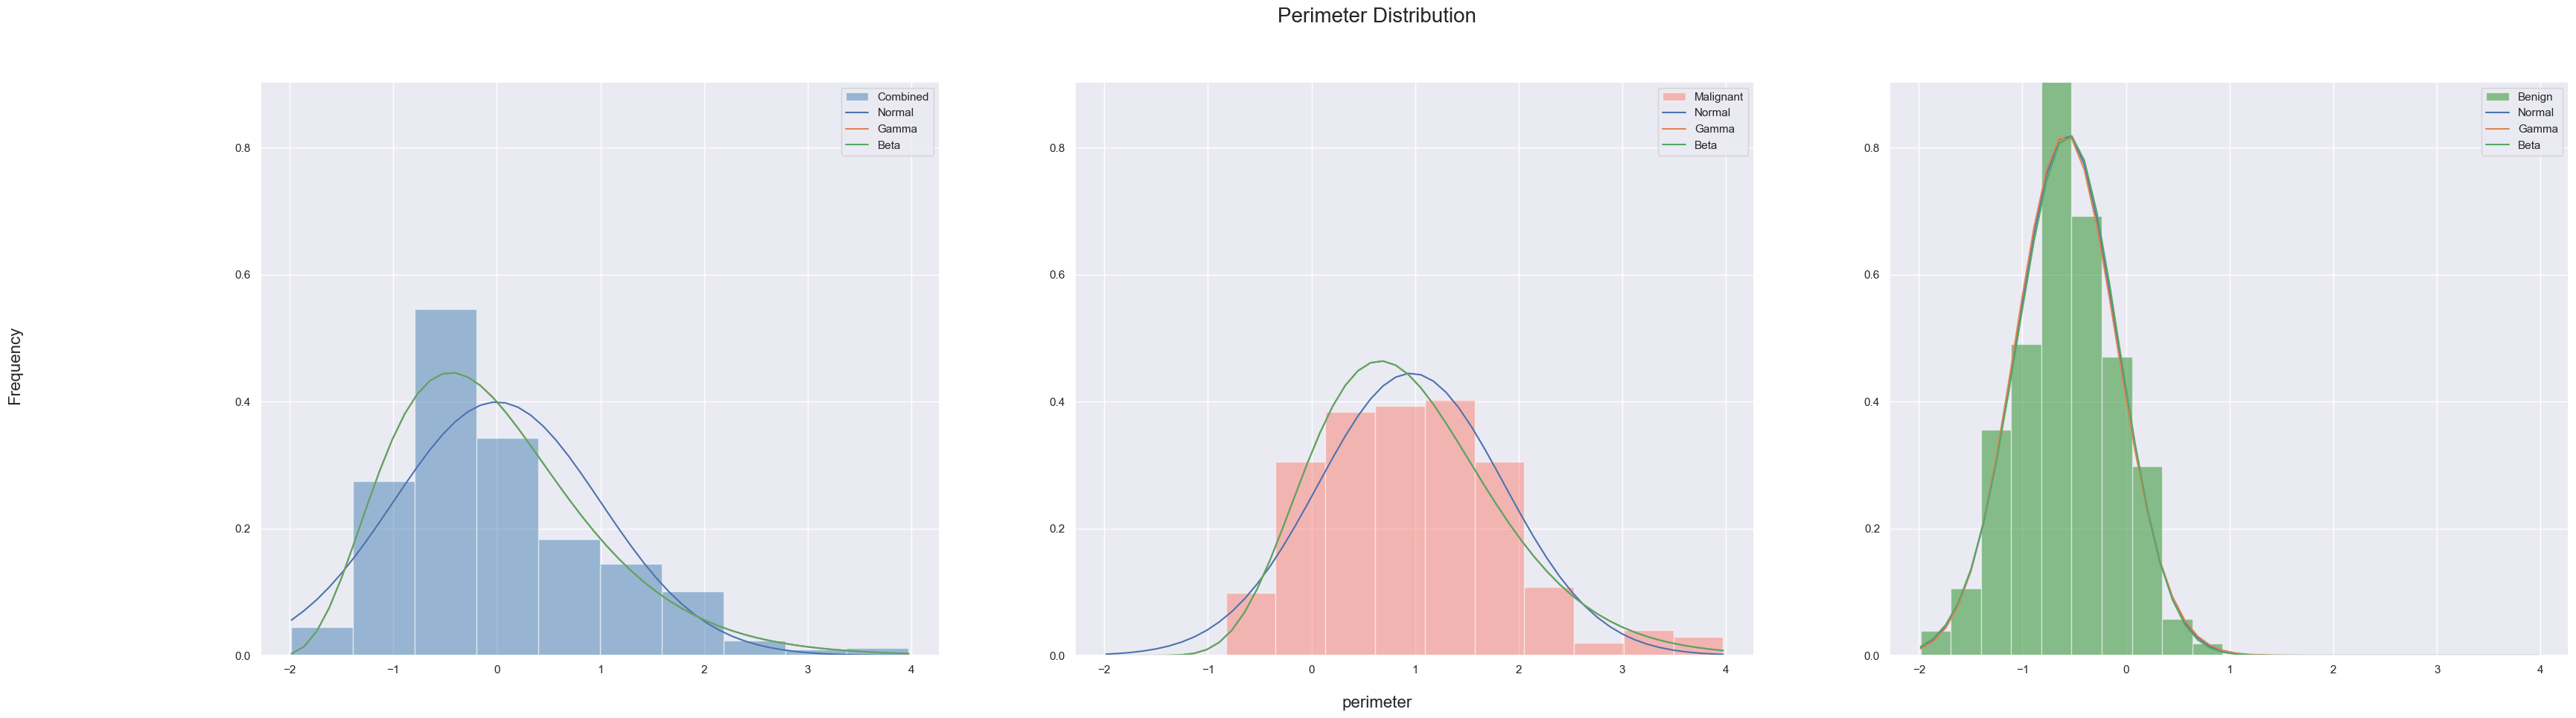

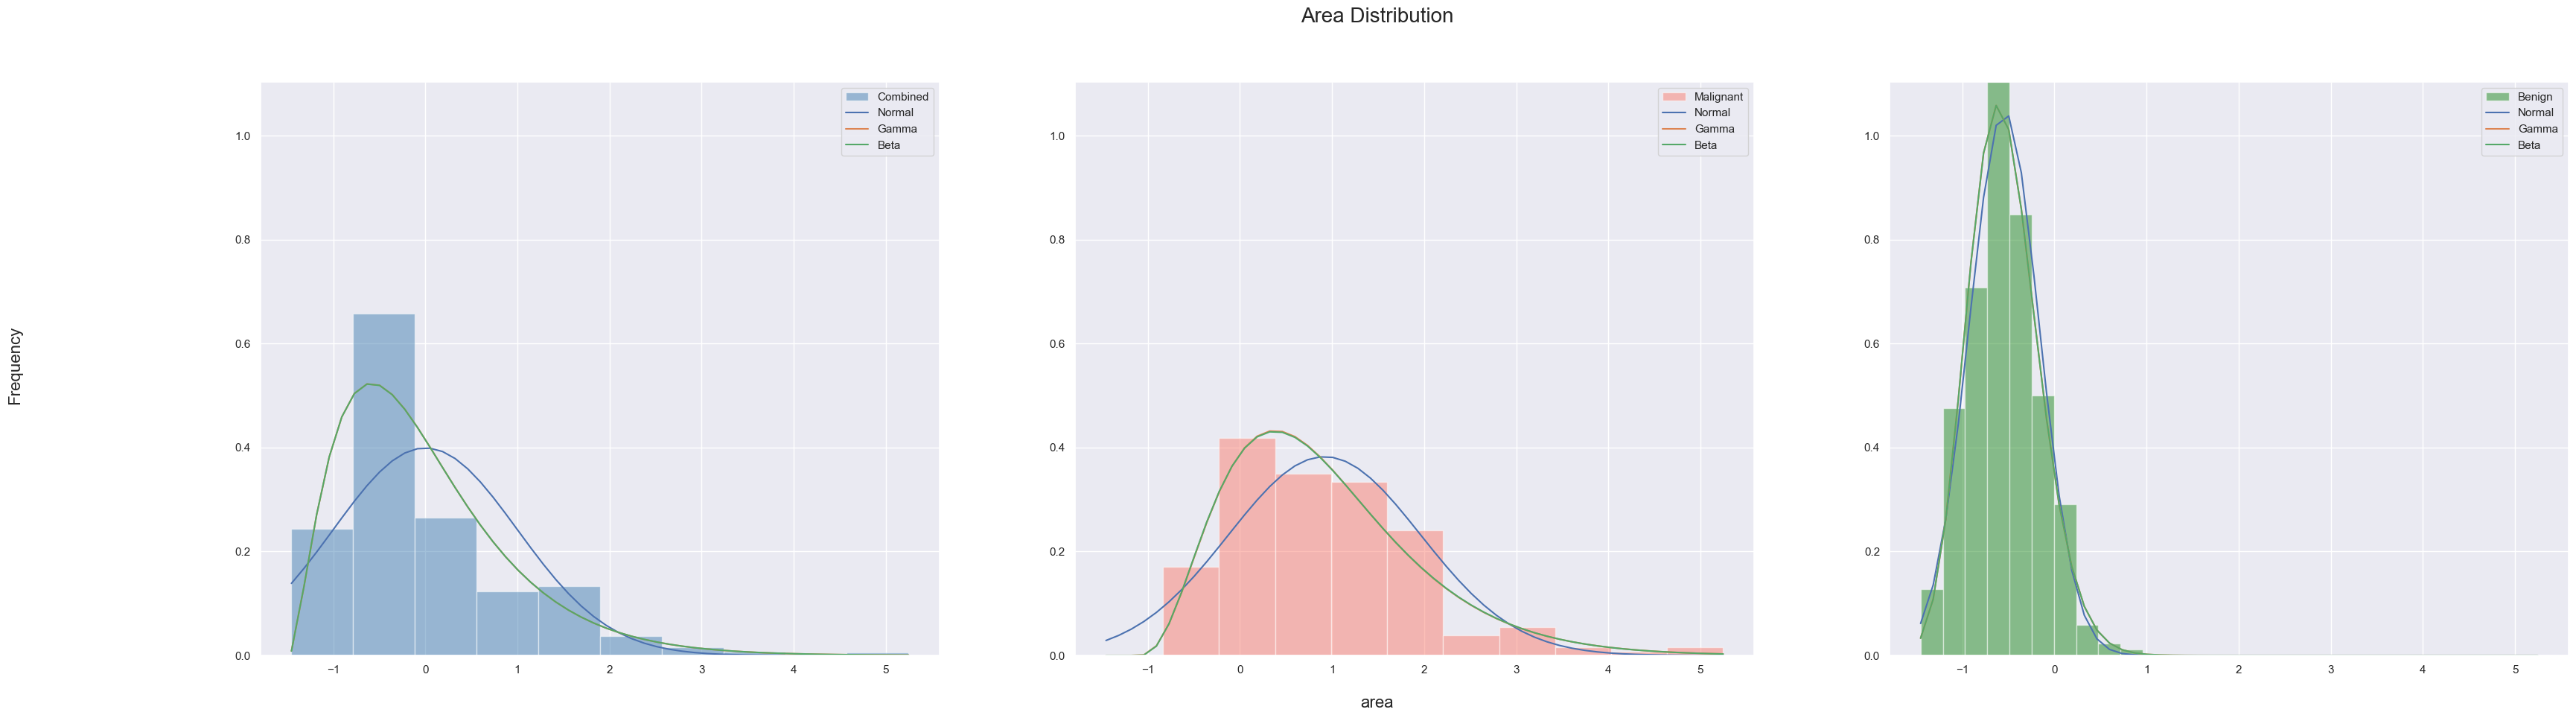

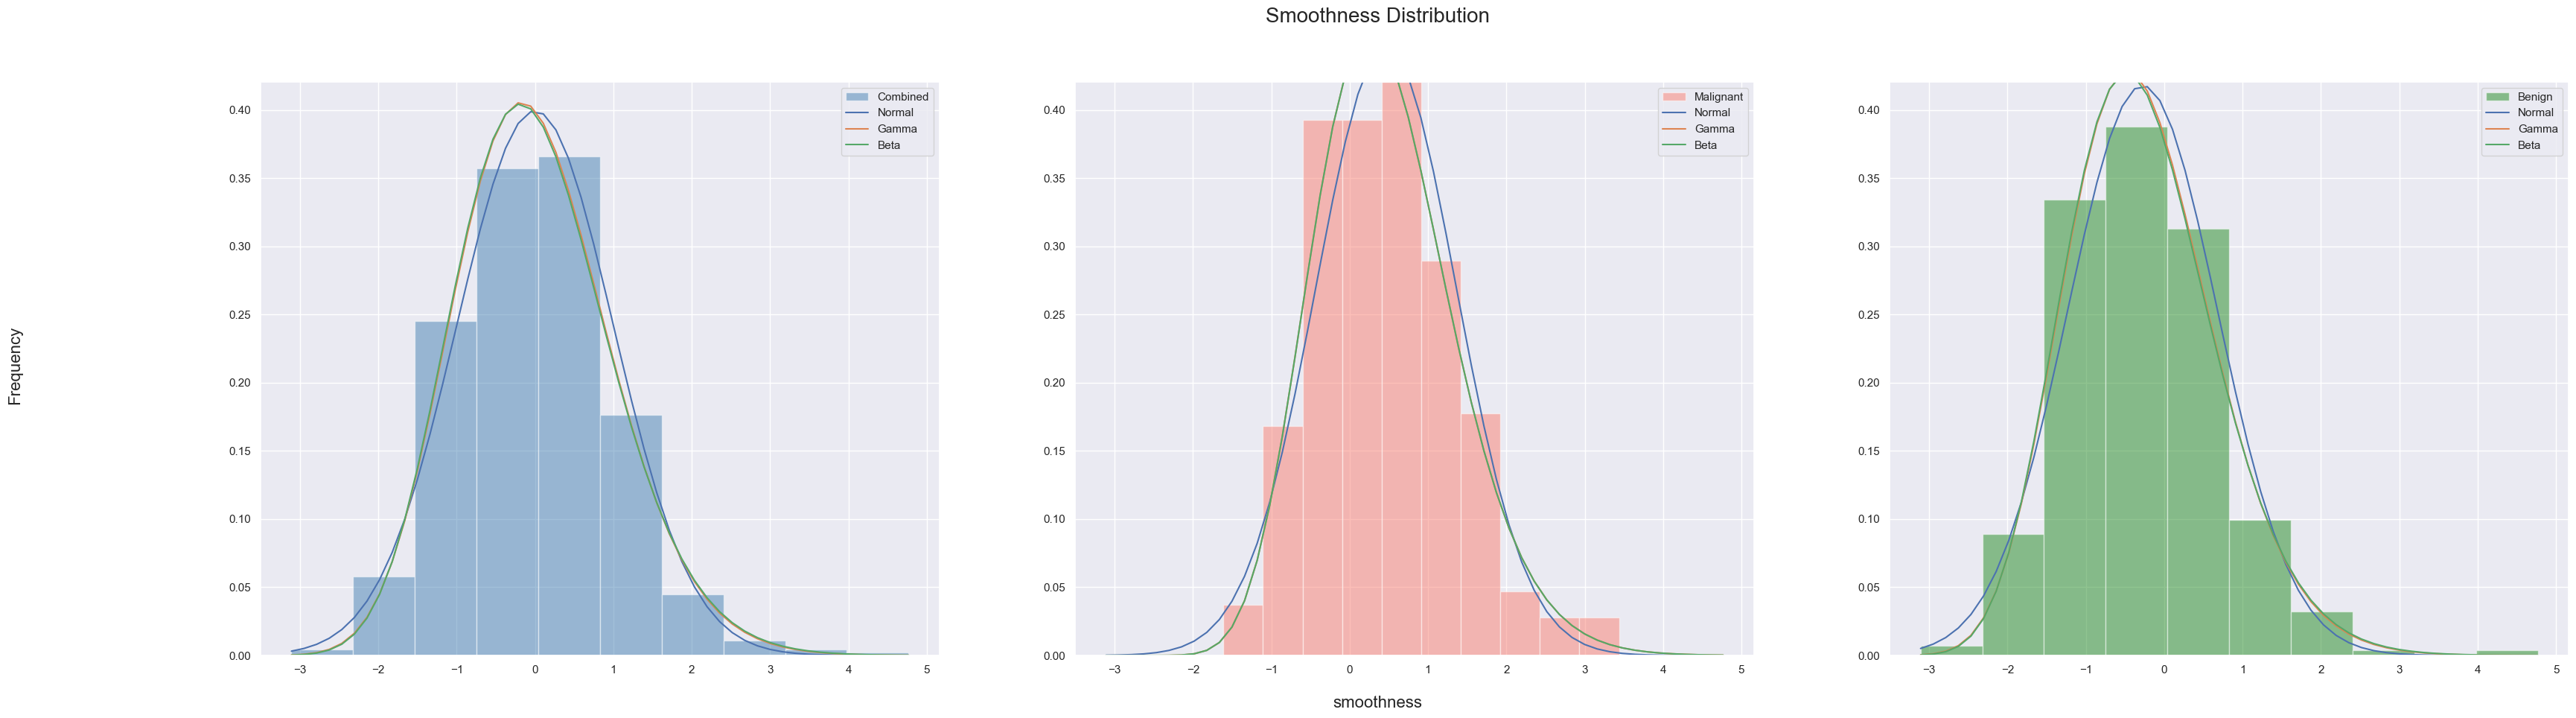

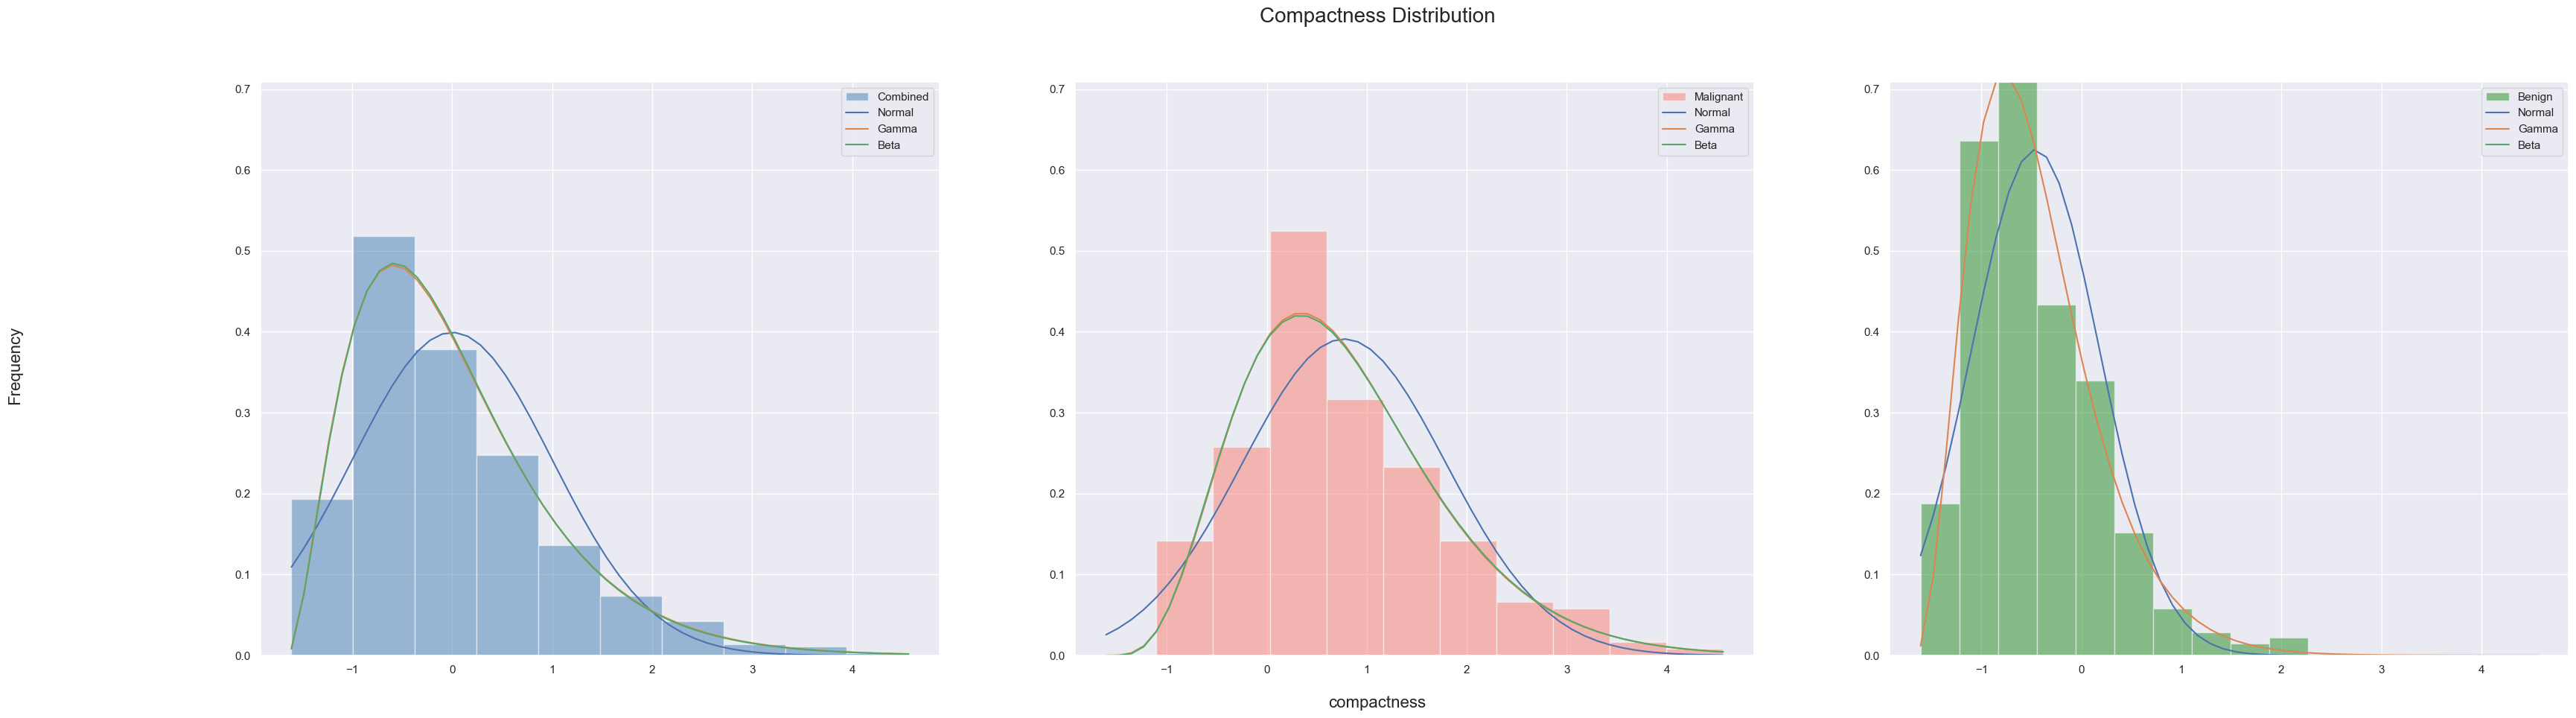

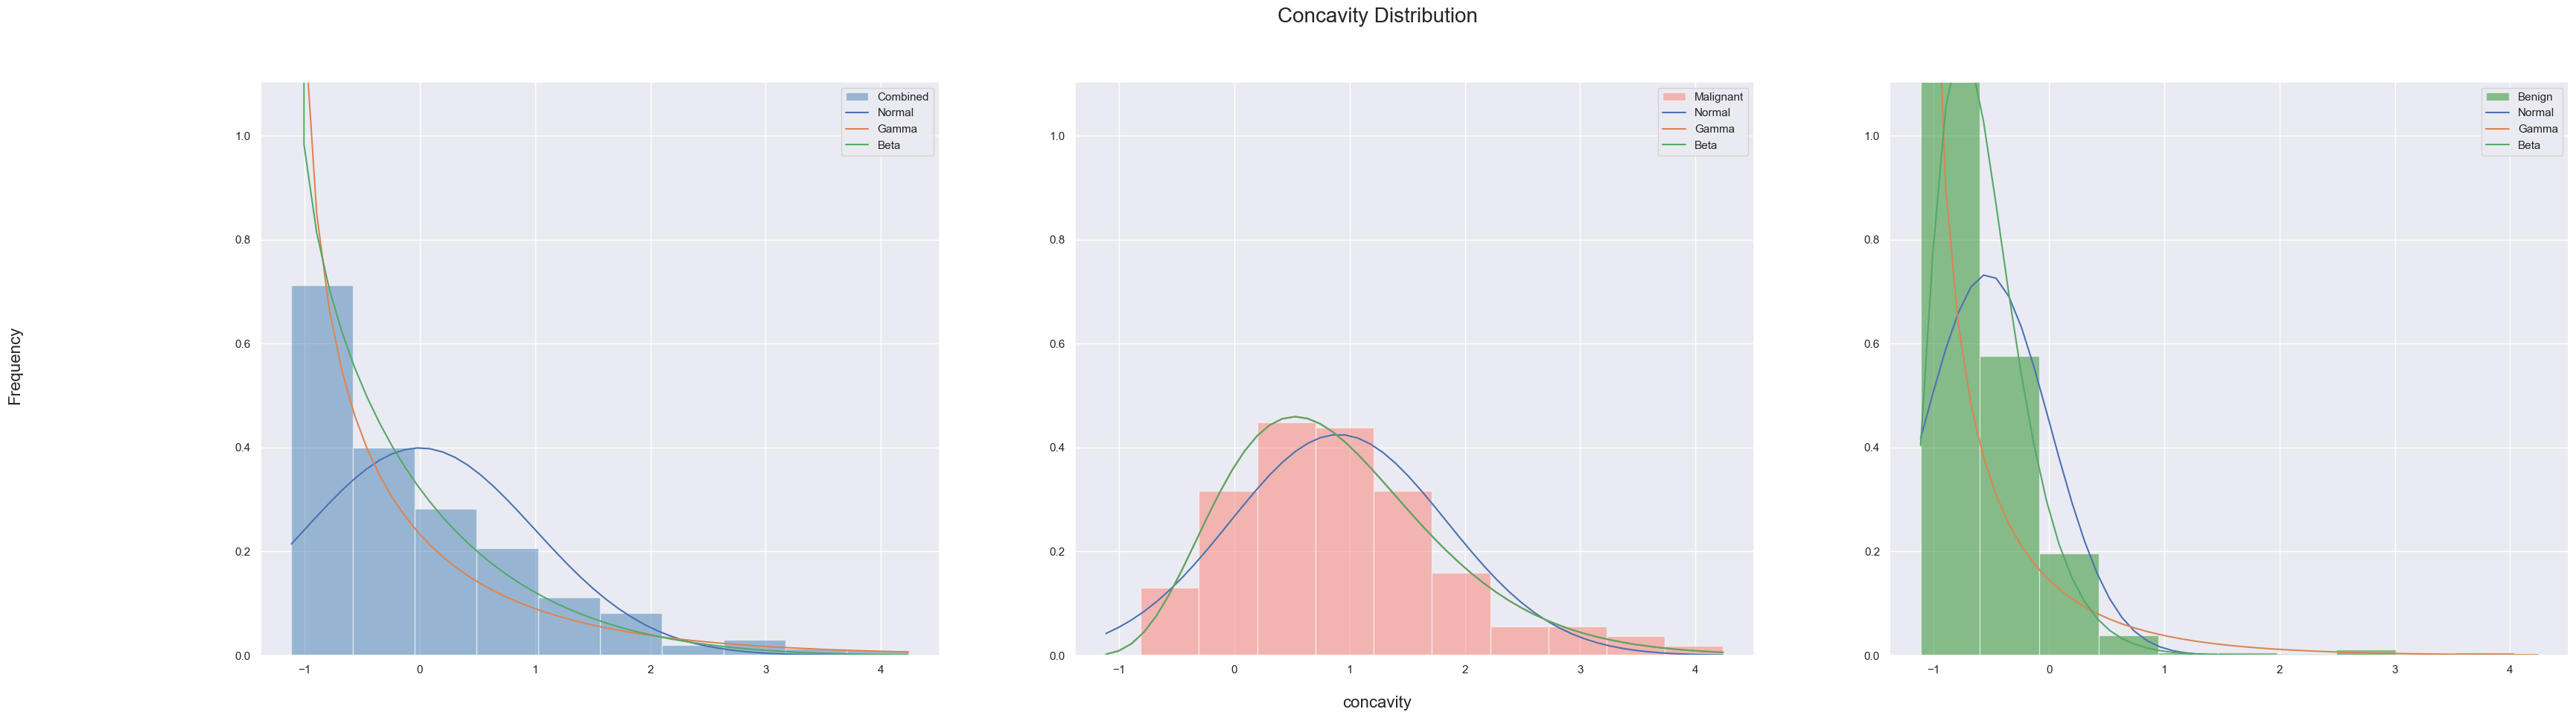

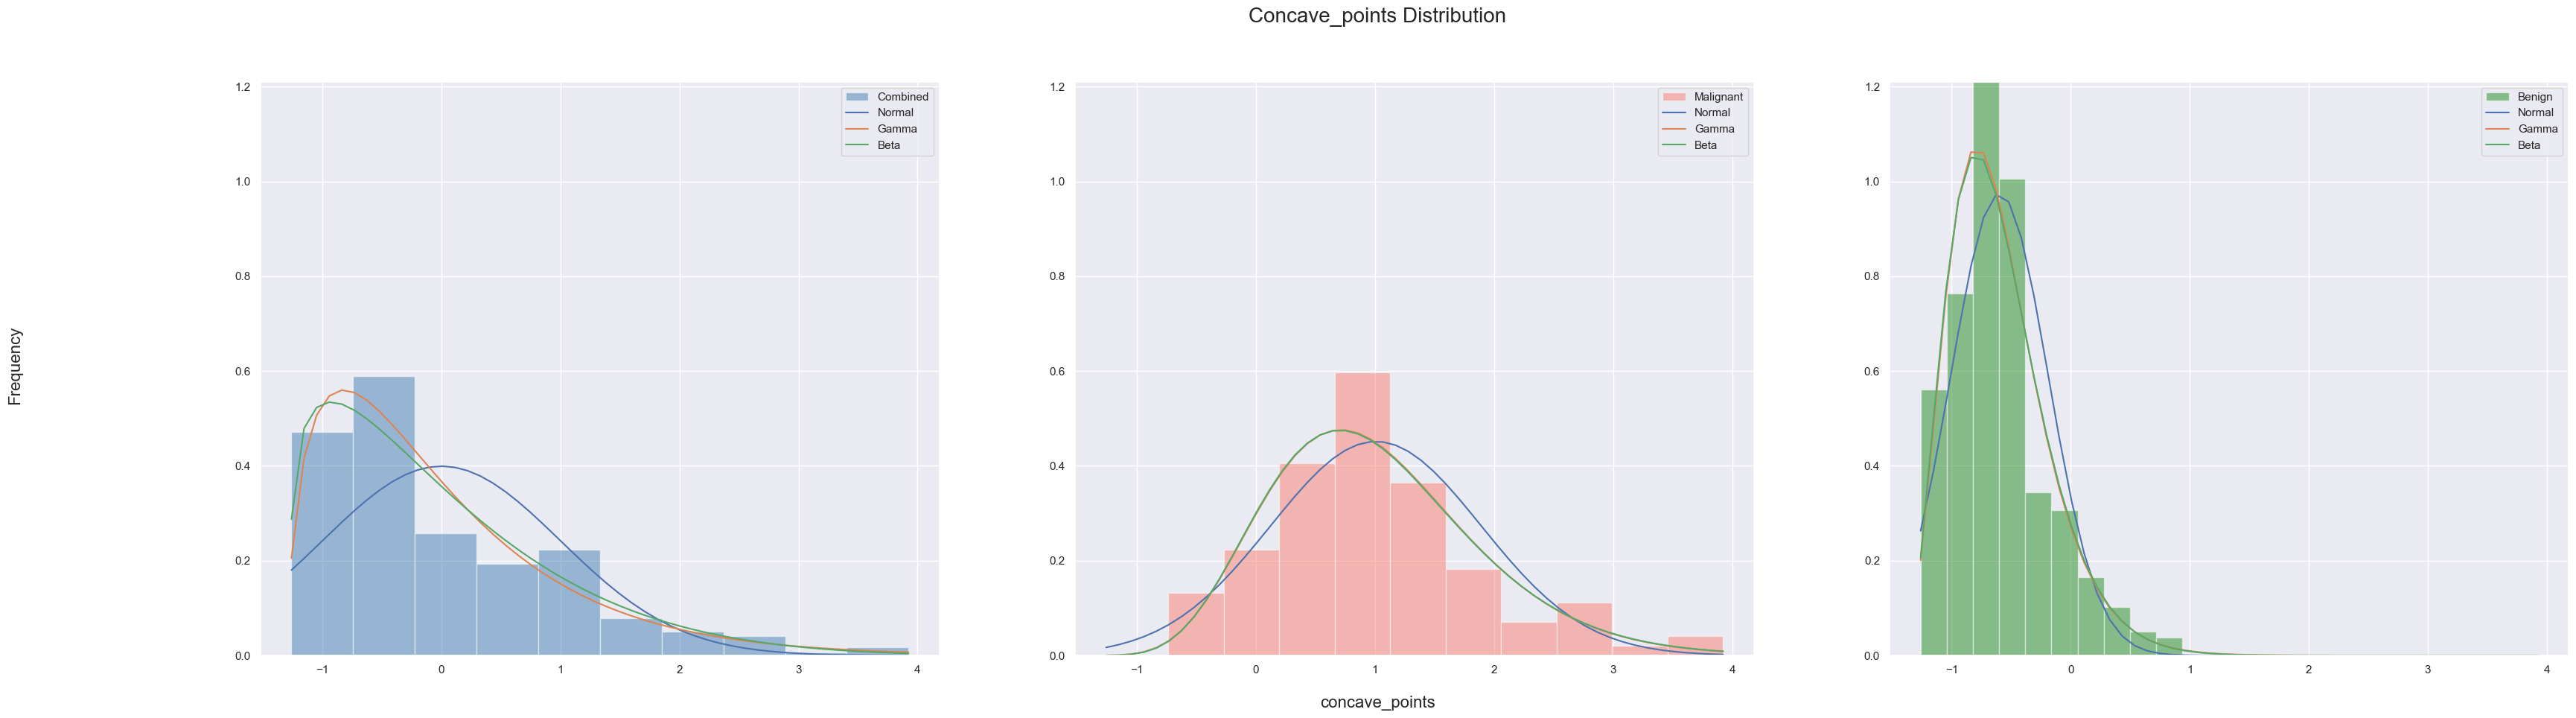

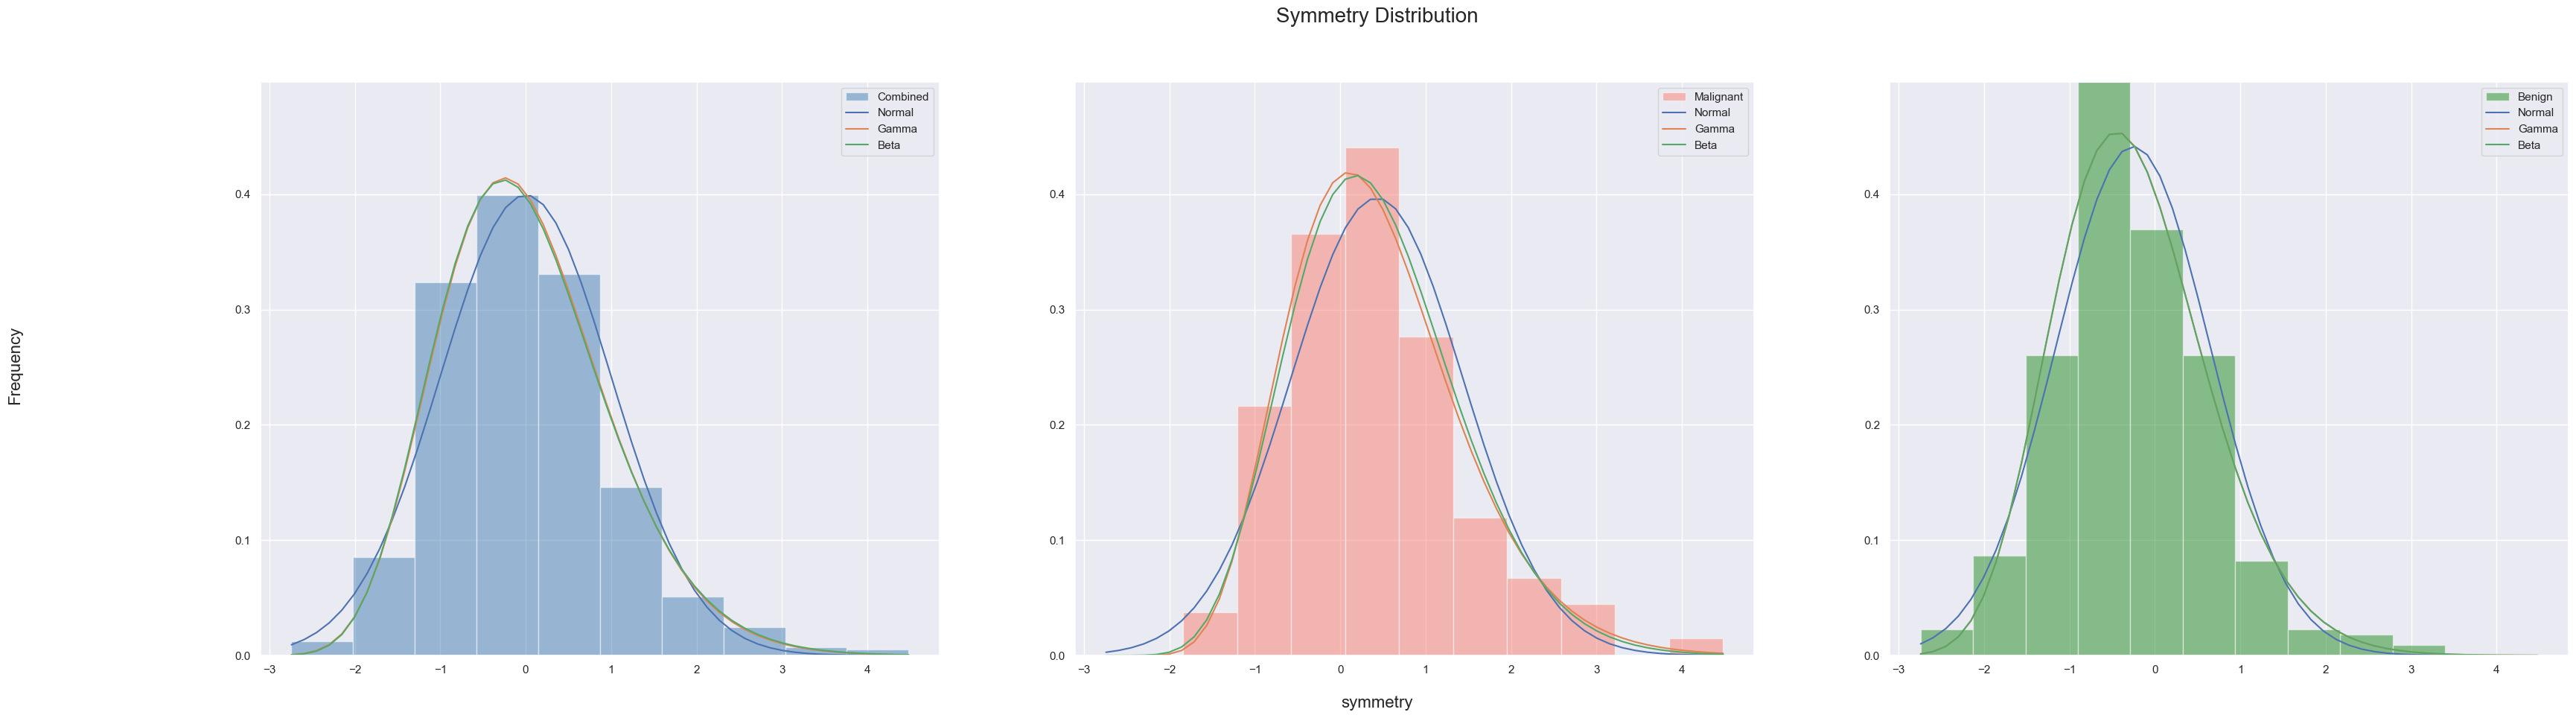

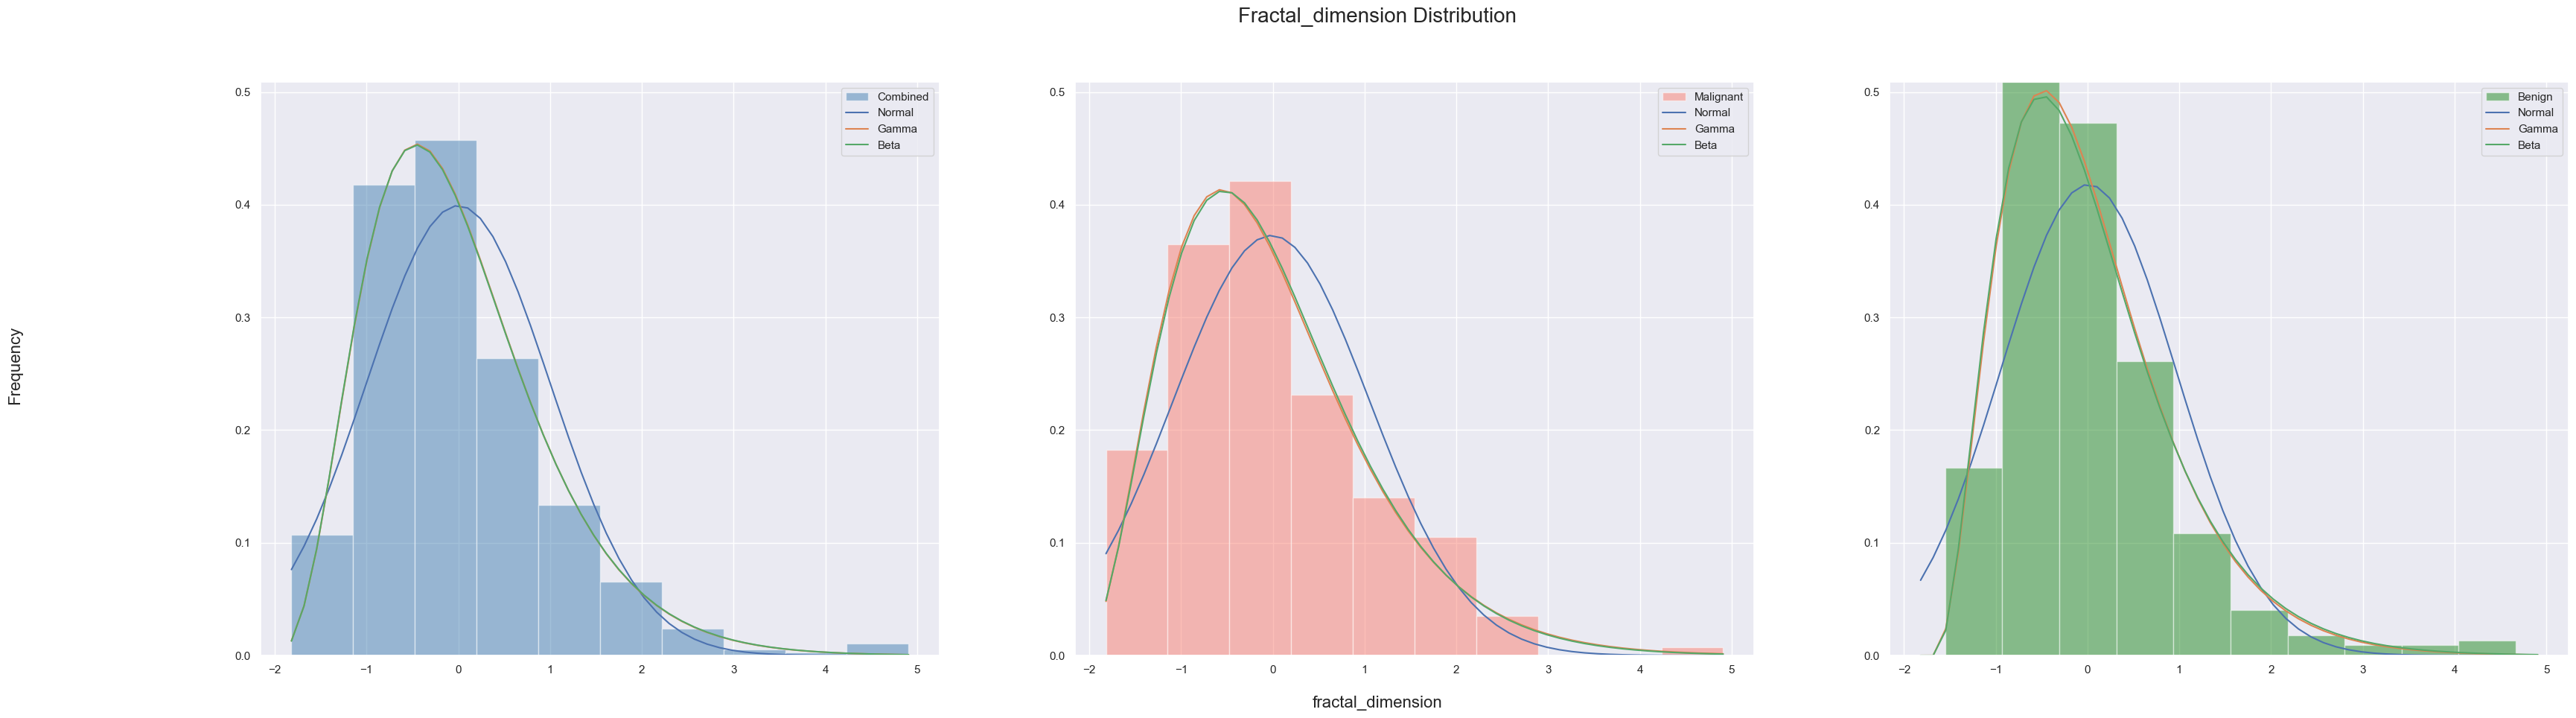

In [36]:
for column in df.columns[1:]:
    plot_histogram_distribution(df, column, f'{column.capitalize()} Distribution', f'{column}', 'Frequency')

Analyzing the above fitted distributions, it becomes apparent that not all of these features are accurately fit by the normal, gamma, or beta. For example, take a look at the Area, Concavity, and Concave Point features, specifically the combined data. Comparing these graphs to, let's say, the benign Radius or Symmetry distributions, these specific distributions do not fit accurately to our data.

Additionally, we have made incorrect assumptions in attempting to fit a Naive Bayes Classifier. As mentioned above, the classifier requires each of our data features to be independent of each other; looking more into how our dataset was collected, we can immediately tell this is not the case. As an example, the features Radius, Perimeter, and Area all are derived from measurements of tumors from patients. More can be read about how each of the features were collected and how they relate [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

Due to these reasons, we have decided to move against continuing our Bayes Classifier analysis.

# SVM

Our next classifier we will be exploring is the Support Vector Machine. Very similar to lots of the other linear classifiers we have discussed throughout this course, SVM relies on calculating a hyperplane that linearly separates our data. What becomes different with SVM is the utilization of kernel functions. Kernel functions allow us to add or remove dimensionality and other measurements within our data; what this allows us to do is sometimes better fit linear classifiers to non-linear data. While this may immediately sound like a direct improvement to the simple SVM, kernel functions might add to overfitting of our classifier.

Below, we analyze 4 different types of kernel functions: linear (simple), polynomial, radial, and sigmoid. The linear kernel is just our standard SVM. The polynomial kernel function is a generic form of kernels with degree greater than one degree; it has been seen to work very well in processing, analyzing and generating images. In this case, we tested polynomials of degree 2, 8, and 16. The radial basis function, also known as the Gaussian kernel, is used mainly when we don’t understand data in advance; it operates well with lesser amounts of data, however, employing it on smaller datasets may increase the likelihood of overfitting. The sigmoid kernel is mainly used in applying neural networks.

Below are the results of applying 10,000 iterations of each kernel, utilizing a random 85%-15% train-test split at each iteration:

Accuracy Over 10000 Iterations for Linear Kernel SVM: 93.33406976744187%


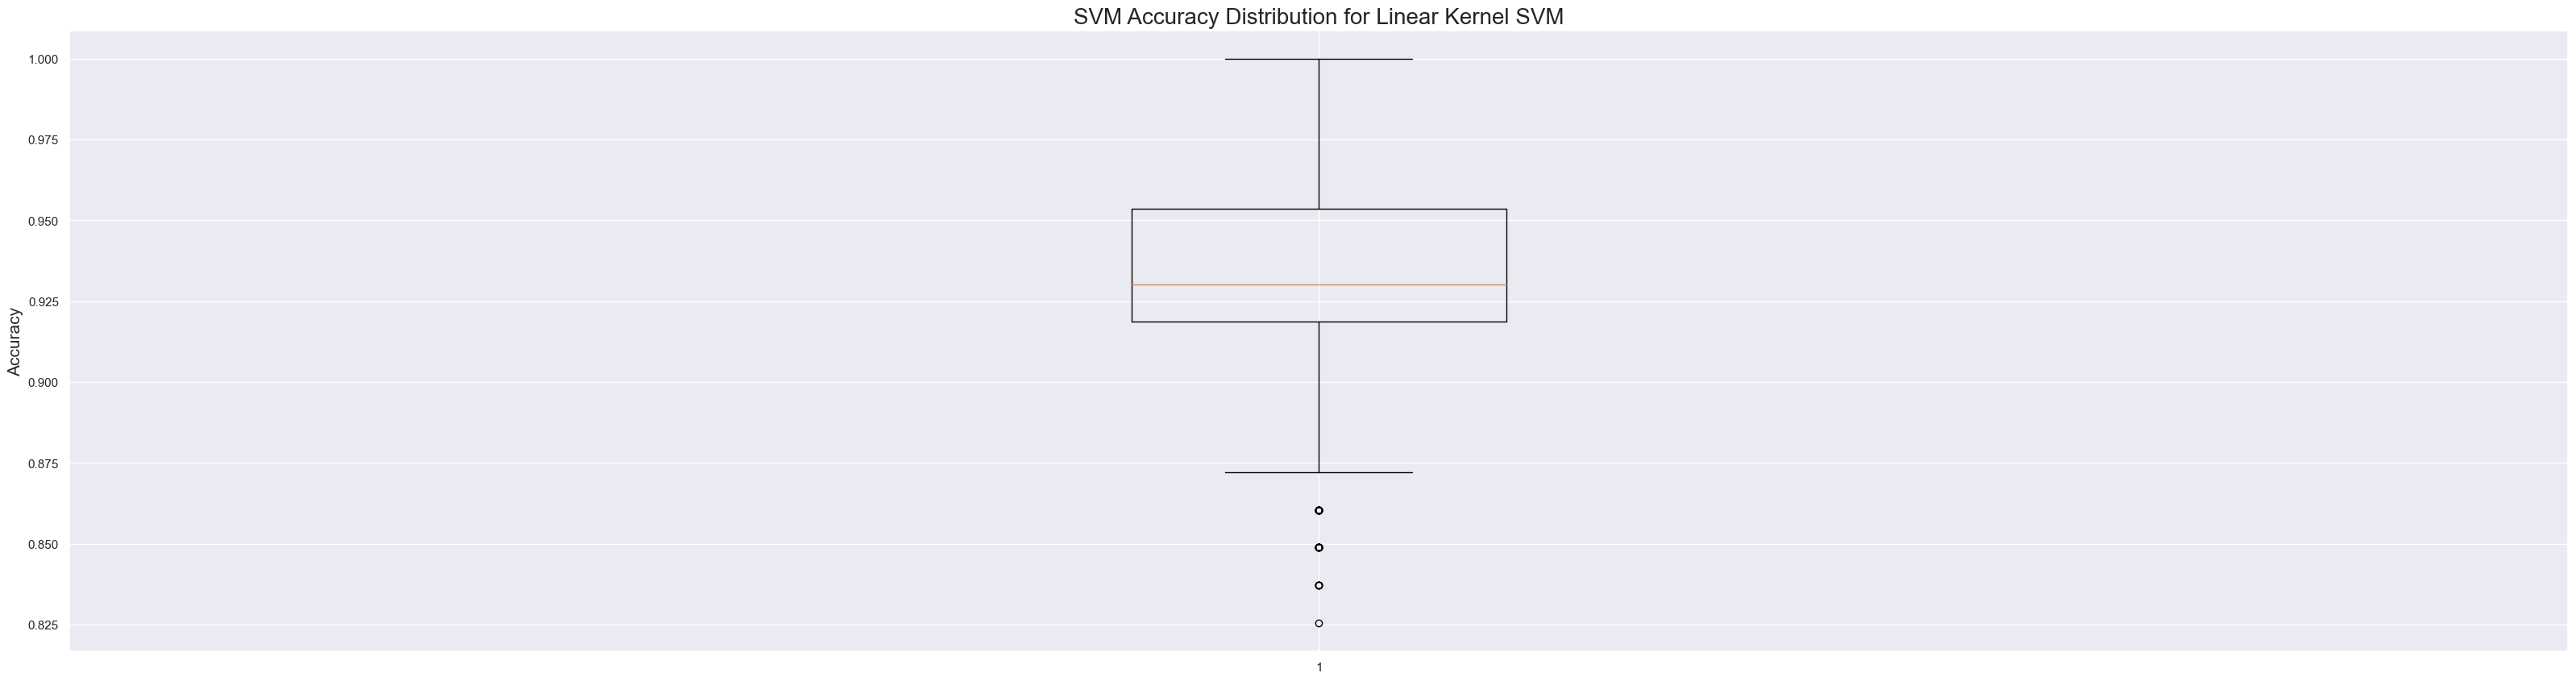

Accuracy Over 10000 Iterations for Polynomial with degree 2 Kernel SVM: 76.5836046511628%


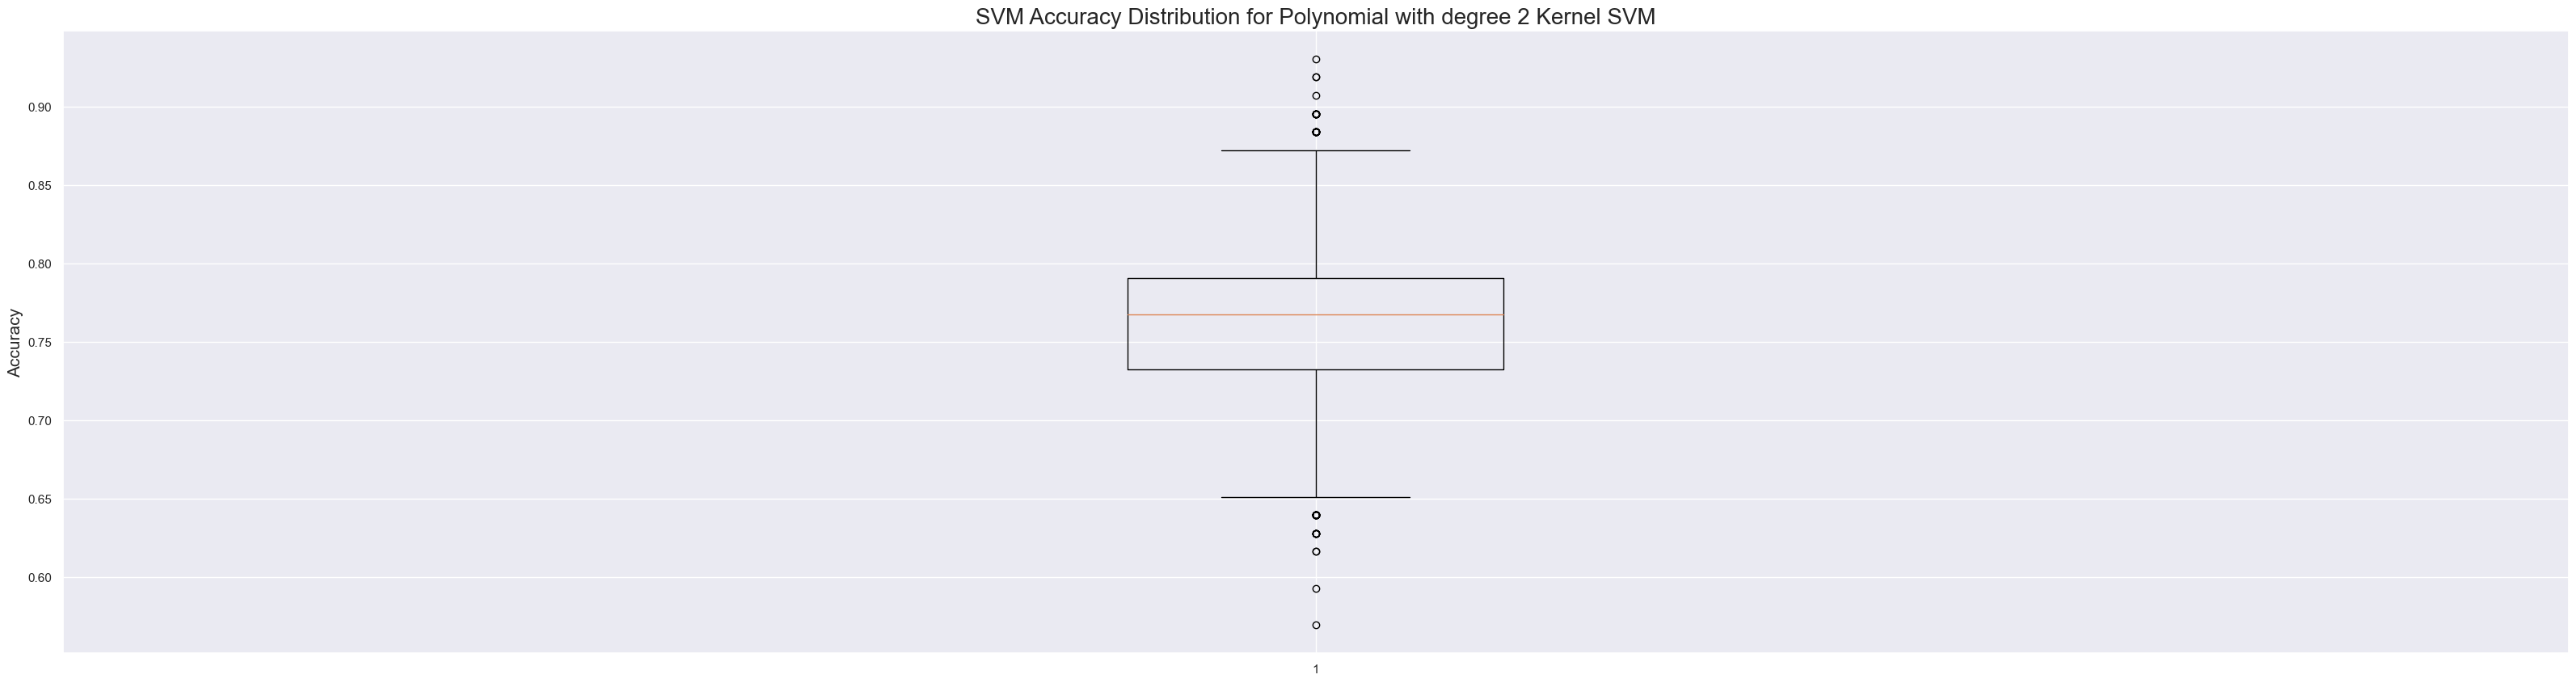

Accuracy Over 10000 Iterations for Polynomial with degree 8 Kernel SVM: 75.30453488372093%


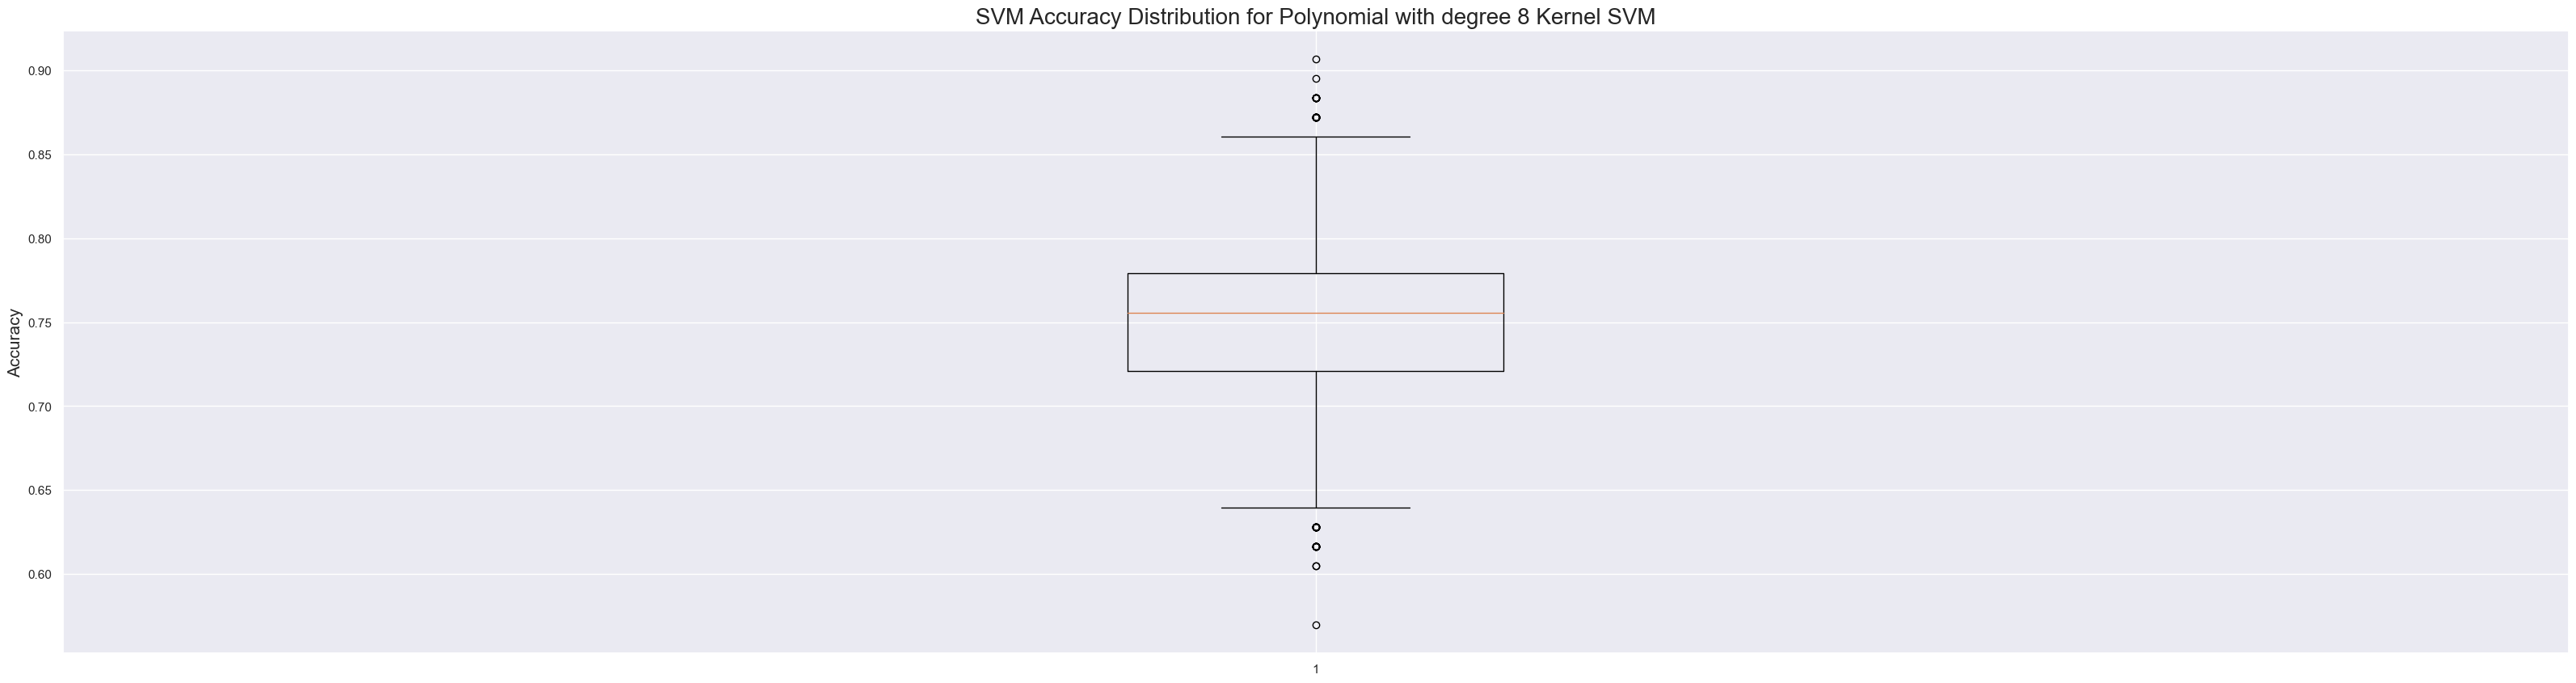

Accuracy Over 10000 Iterations for Polynomial with degree 16 Kernel SVM: 74.34906976744186%


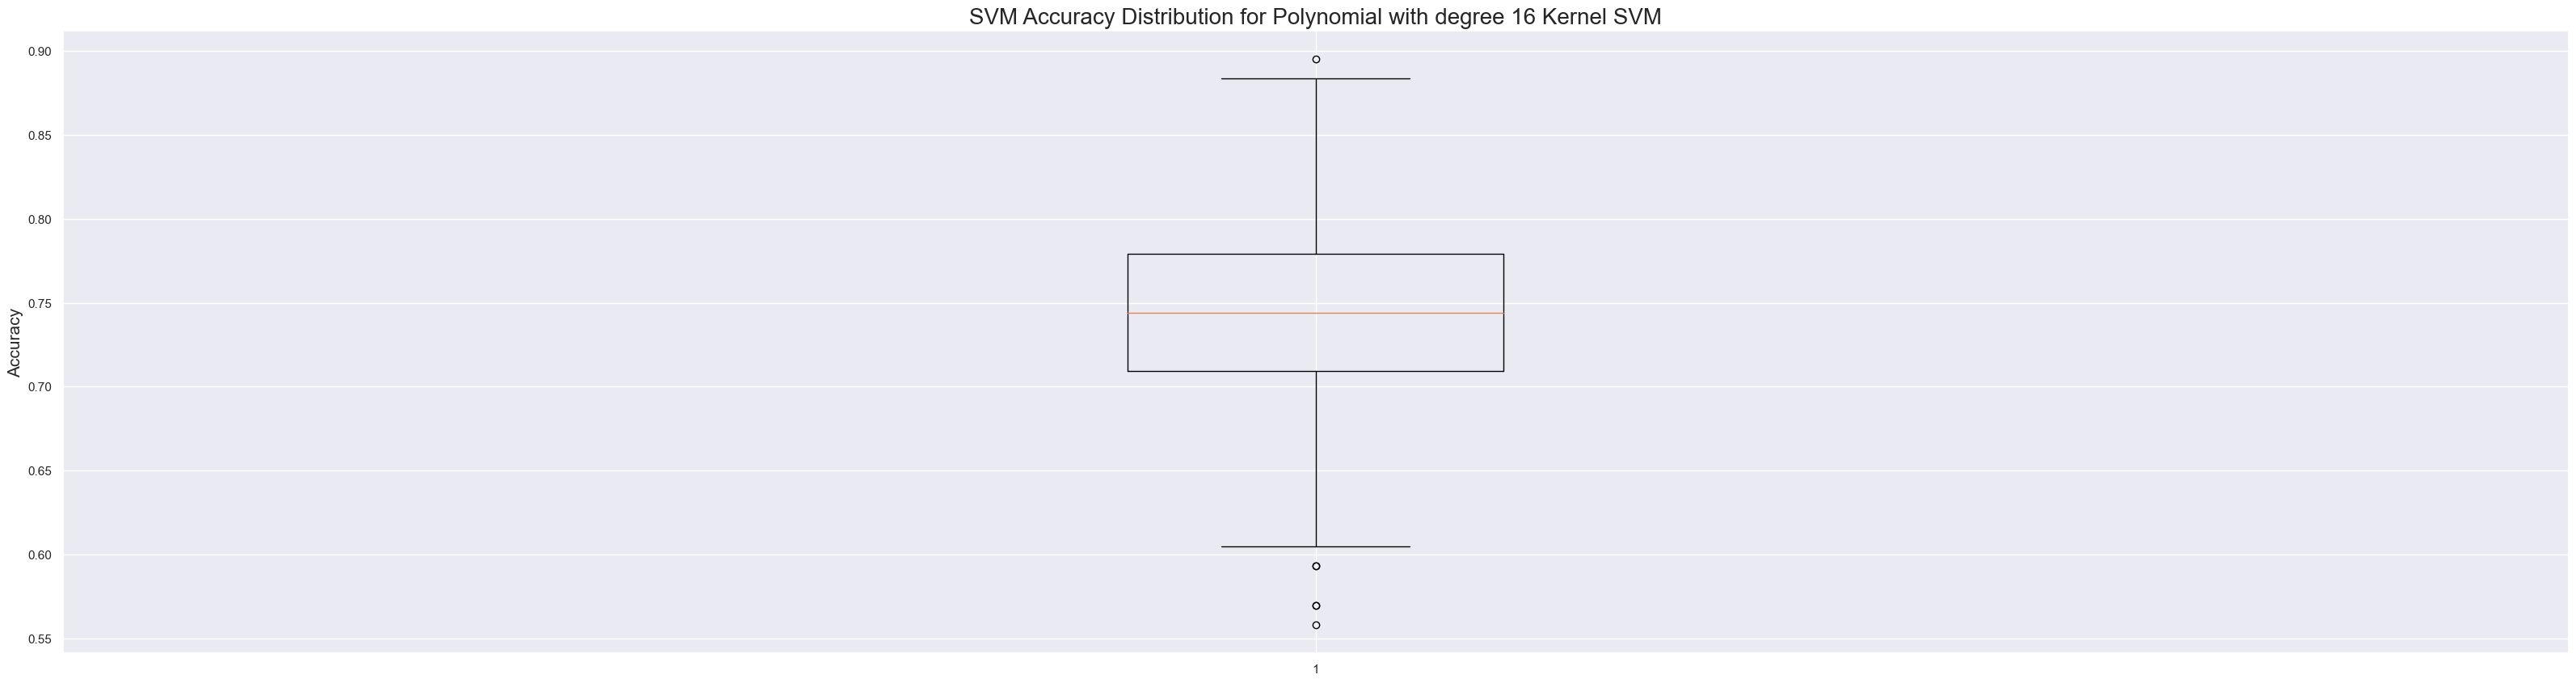

Accuracy Over 10000 Iterations for Gaussian Kernel SVM: 94.50720930232559%


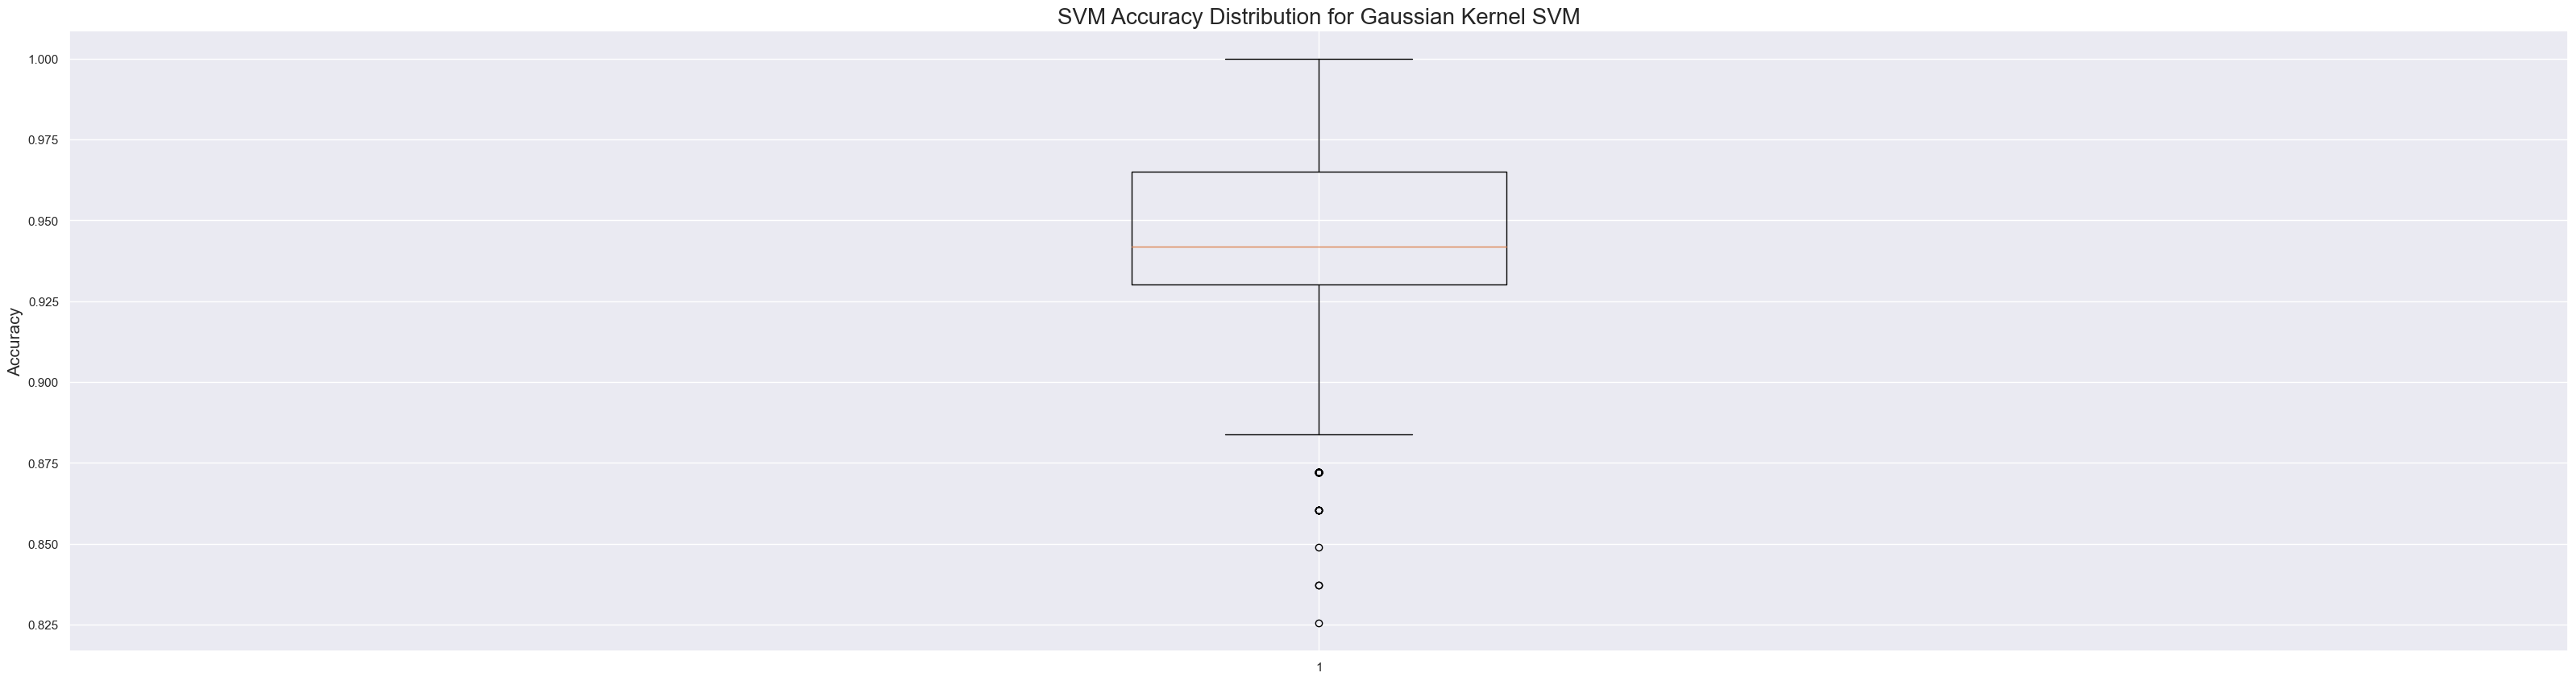

Accuracy Over 10000 Iterations for Sigmoid Kernel SVM: 89.03906976744184%


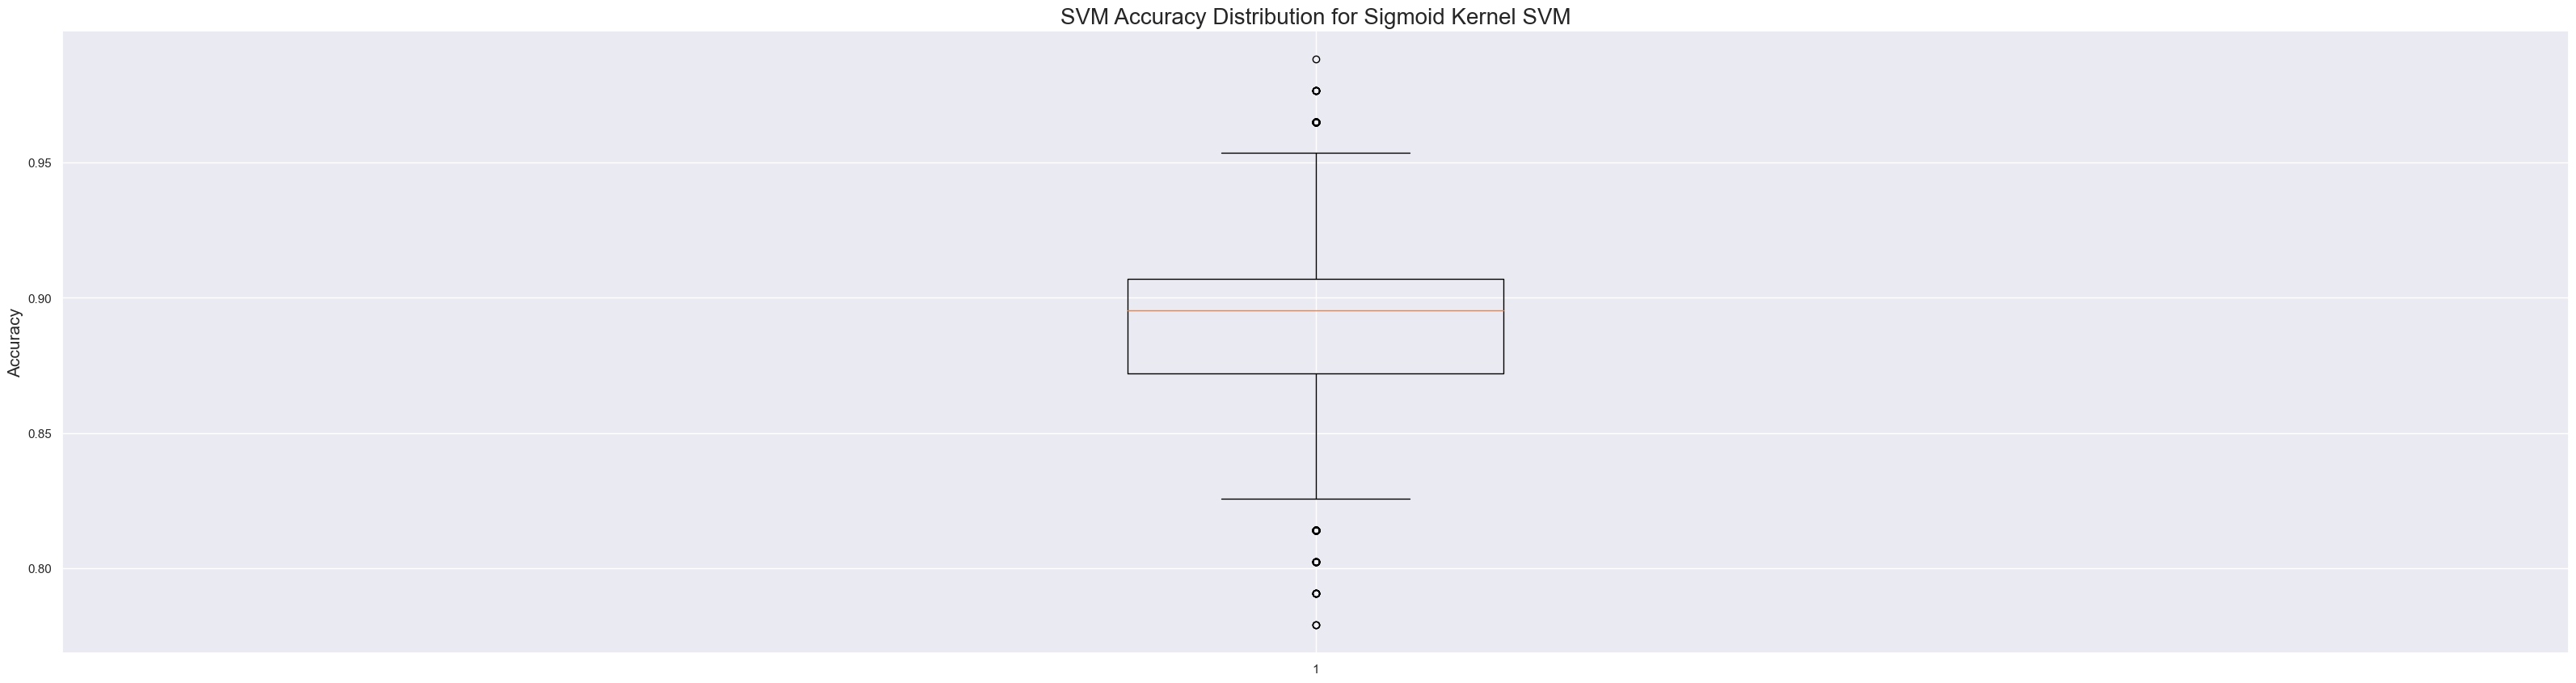

Best Kernel: Gaussian Kernel SVM
Best Accuracy: 0.9450720930232559


In [37]:
# Test various kernels for SVM
# Testing: linear, degree 2, 8, 16 polynomials, Gaussian, and sigmoid
best_kernel, best_accuracy = _, 0
kernel_mapping = {
    '{"kernel" : "linear"}'                 : 'Linear Kernel SVM',
    '{"kernel" : "poly", "degree" : 2}'     : 'Polynomial with degree 2 Kernel SVM',
    '{"kernel" : "poly", "degree" : 8}'     : 'Polynomial with degree 8 Kernel SVM',
    '{"kernel" : "poly", "degree" : 16}'    : 'Polynomial with degree 16 Kernel SVM',
    '{"kernel" : "rbf"}'                    : 'Gaussian Kernel SVM',
    '{"kernel" : "sigmoid"}'                : 'Sigmoid Kernel SVM',
}

for kernel, desc in kernel_mapping.items():
    # Build, train, and run SVM over 10000 iterations
    accuracies, accuracy = run_SVM(df, json.loads(kernel))
    print(f'Accuracy Over 10000 Iterations for {desc}: {accuracy * 100}%')

    # Box plot for all SVM iterations
    plot_box(accuracies, f'SVM Accuracy Distribution for {desc}', '', 'Accuracy')
    
    if accuracy > best_accuracy:
        best_kernel = desc
        best_accuracy = accuracy

print(f'Best Kernel: {best_kernel}')
print(f'Best Accuracy: {best_accuracy}')

Overall, our SVM performed quite well, each of which performing above ~75% accuracy. Interestingly however, our kernels fall into 2 categories.

The first is our polynomial kernels. As mentioned above, polynomial kernels are mainly used and have been measured to see success in image classification and generation. When applying them here, across each of the 3 different degrees of polynomials tested, they performed significantly worse than each of the other kernels.

Our second category is our more successful kernels: linear, RBF, and sigmoid. Each of these performed extremely well, with the RBF and linear performing closely near 93% accuracy; the RBF performed best. As mentioned above, the RBF kernel is a universal kernel best used for extrapolating data, especially when there are lesser amounts. Our dataset of only 569 datapoints is definitely smaller than what would be considered an extensive dataset, thus explaining why this kernel may have performed best. Thinking more about what this kernel actually does, let's think about what Gaussian kernels do across other mathematical functions. Gaussian convolutions, Gaussian blurs, and Normal (Gaussian) Distributions all tend to mold data towards an average. Given that we had to disregard the Bayes Classifier due to feature dependence, the Gaussian kernel might extrapolate these connections to allow for better linear separation utilizing a hyperplane.

# Single Layer Perceptron Classifier

Next, we will run the Single Layer Perceptron algorithm. We split the breast cancer dataset into testing and training datasets and run the perceptron algorithm from scikit-learn. To start, we run perceptron for just one iteration and print out the classification report.

In [38]:
# split data up into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(df_bool, df_bool['diagnosis'])

# get predictions from the Perceptron Classifier, and print the classification reports
pred_tr, pred_te = perceptron(X_train, X_test, Y_train)
printPerceptron(Y_train, Y_test, pred_tr, pred_te)

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       264
           1       0.99      1.00      0.99       162

    accuracy                           1.00       426
   macro avg       0.99      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.96      1.00      0.98        50

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.98       143
weighted avg       0.99      0.99      0.99       143



Let's understand this classification report. What do the labels mean?

Precision: The ability of a classifier not to label an instance positive that is actually negative

Recall: The ability of a classifier to find all positive instances

F1 Score: The percent of positive predictions that were correct

Note that these measures of accuracy are given for each class, as we can see 0 and 1, where 0 is benign and 1 is malignant.

To learn more about classification reports, [visit the link here](https://muthu.co/understanding-the-classification-report-in-sklearn/)

Looking at the report as a whole, the Perceptron appears to do well, with 99%-100% precision rates on both the training and test data. The recall and F1 scores are also very high.

However, the perceptron was only run once in this case. Next, let's run the algorithm 10,000 times, store the accuracies that are produced at each run, and average them to see how the single layer perceptron fares in the long term.

Accuracy Over 10000 Iterations: 91.60558139534885%


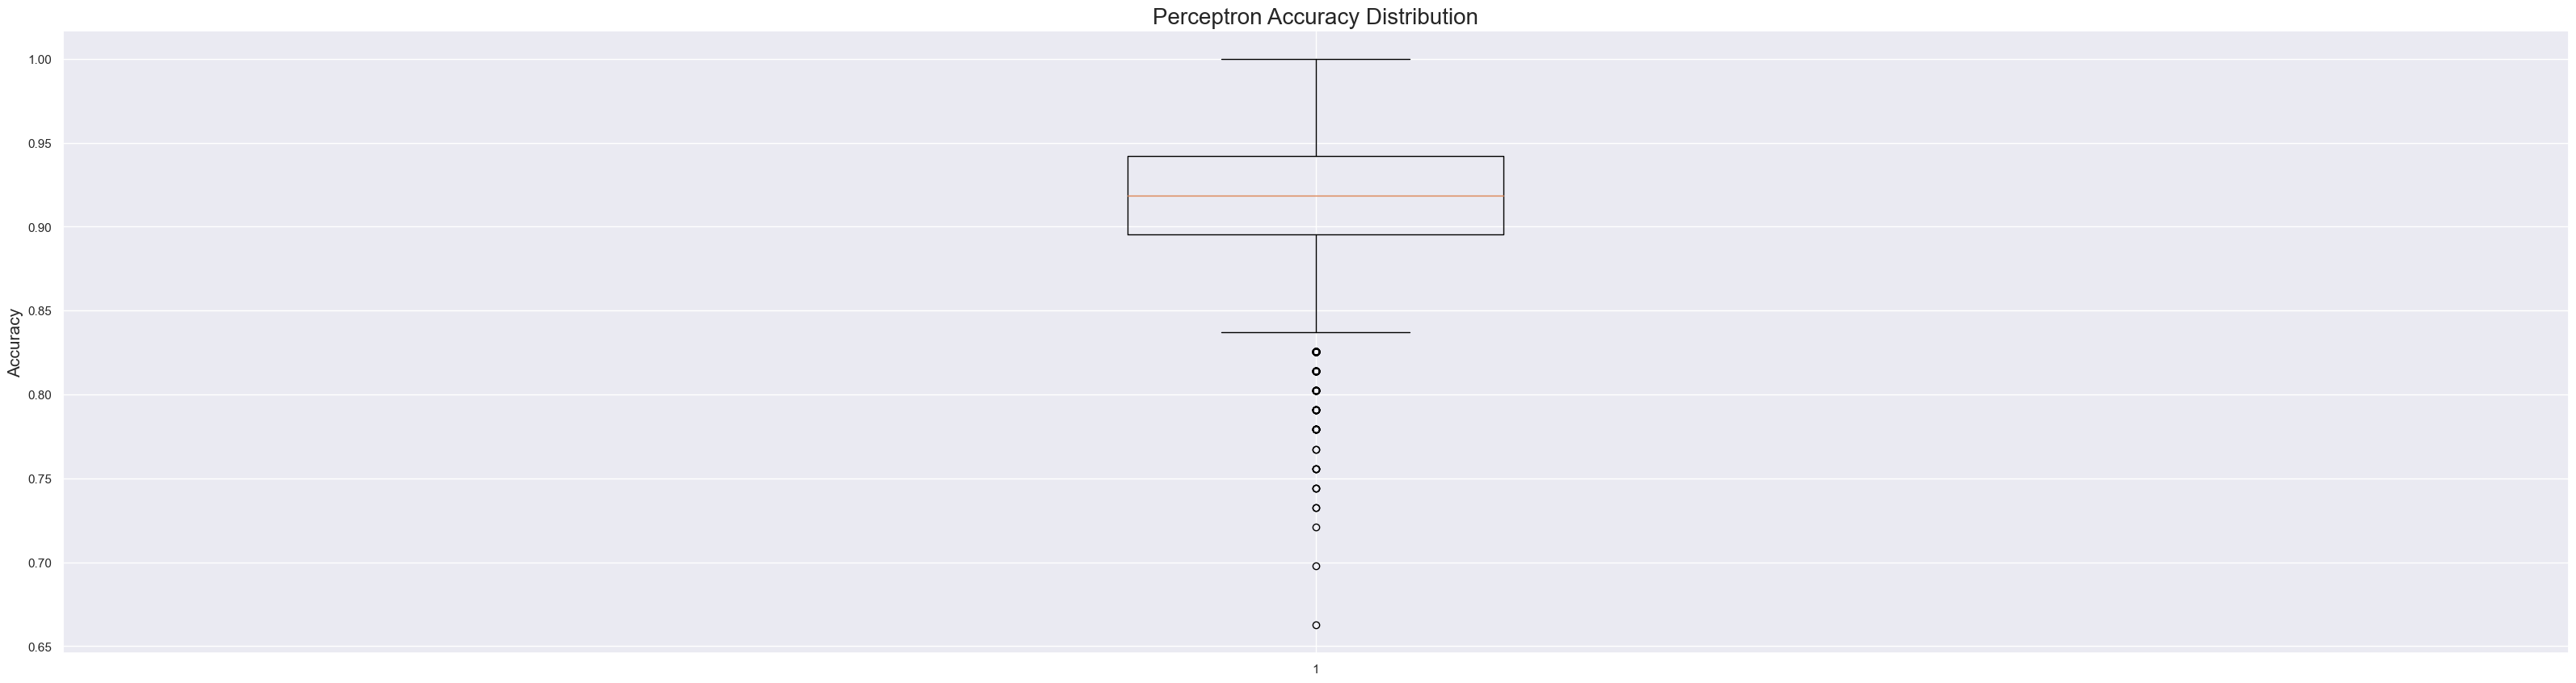

In [43]:
# Build, train, and run Perceptron over 10000 iterations
accuracies, accuracy = run_Perceptron(df)
print(f'Accuracy Over 10000 Iterations: {accuracy * 100}%')

# Box plot for all Perceptron iterations
plot_box(accuracies, 'Perceptron Accuracy Distribution', '', 'Accuracy')

We have constructed a boxplot of accuracies over all 10,000 iterations to visalize the data. For this run of the function, we have the following indicators:

- Min: 84%, with outliers in the 70% - 83% range
- Q1: 90%
- Median: 91.6%
- Q2: 94%
- Max: 100%  

On average, the accuracy was 91.6%. We have found that the single layer perceptron algorithm has a relatively high accuracy for binary classification of the breast cancer data.

# Multi-Layer Perceptron Classifier

The next algorithm we run is the Multi-Layer Perceptron Classifier through scikit-learn. First, we split up the data into training and test data. The Y matrix, or labels, is the diagnosis of that data, malignant or benign. We modified the data to be in true/false form earlier into the dataframe df_bool. We use the default settings, which include the following:
- Hidden layer size: 100
- Activation function: Relu (rectified linear unit function)
- Optimizer: Stochastic Gradient Descent

To start, we just run 1 epoch of the network.

In [39]:
# split data up into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(df_bool, df_bool['diagnosis'])

# get predictions from the MLP Classifier, and print the classification reports, starting with 1 iteration
pred_tr, pred_te = MLPClassify(X_train, X_test, Y_train, 1)
printMLP(Y_train, Y_test, pred_tr, pred_te)

Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       263
           1       0.85      0.91      0.88       163

    accuracy                           0.90       426
   macro avg       0.90      0.91      0.90       426
weighted avg       0.91      0.90      0.90       426

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        94
           1       0.70      0.90      0.79        49

    accuracy                           0.83       143
   macro avg       0.82      0.85      0.82       143
weighted avg       0.86      0.83      0.84       143



As the classification reports show, it seems that the MLP Classifier does a pretty good job even at just 1 iteration, getting high accuracy on the test set and decently high on the training set. At this point, there is no indication that the algorithm has any glaring problems, like underfitting or overfitting. Now, we try testing it over multiple epochs, and graph the accuracy score over the number of epochs or iterations. Still, we are using the default settings.

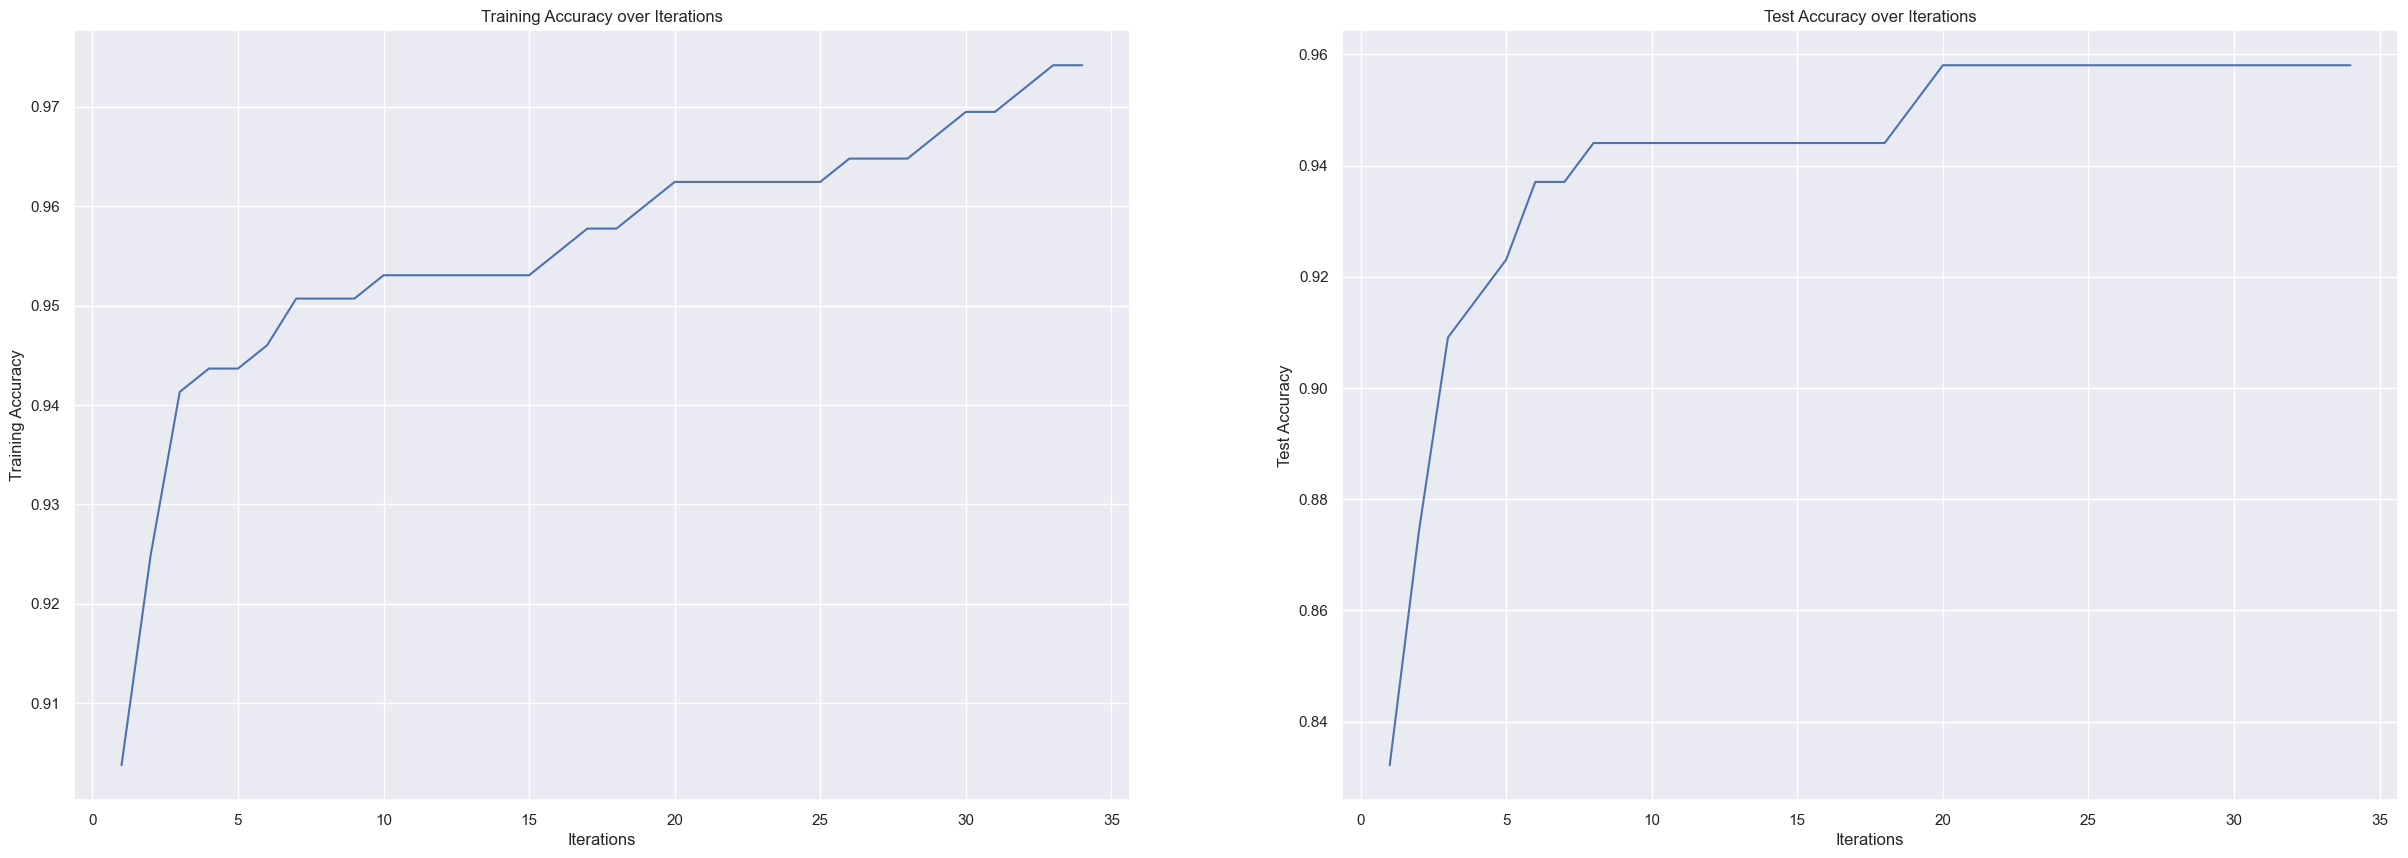

In [40]:

# get the data on mean score over x iterations, then plot training and test accuracy scores.
iterations, training_scores, test_scores = get_score_data(X_train, Y_train, X_test, Y_test, 35)
create_score_plots(iterations, training_scores, test_scores)
    

It looks like the training accuracy sharply increases with the first few iterations, then steadily increases from there. The model could be said to overfit with more epochs, which follows logically. For the test data, the accuracy sharply increases with the first few iterations (like the training data). Then, it seems to overfit with a higher number of epochs, but dips and even decreases with greater and greater number of iterations. This simply means that the model was overfitting the training data, which checks out with our analysis of the first plot.

Next, we try a different activation function, 'tanh'.

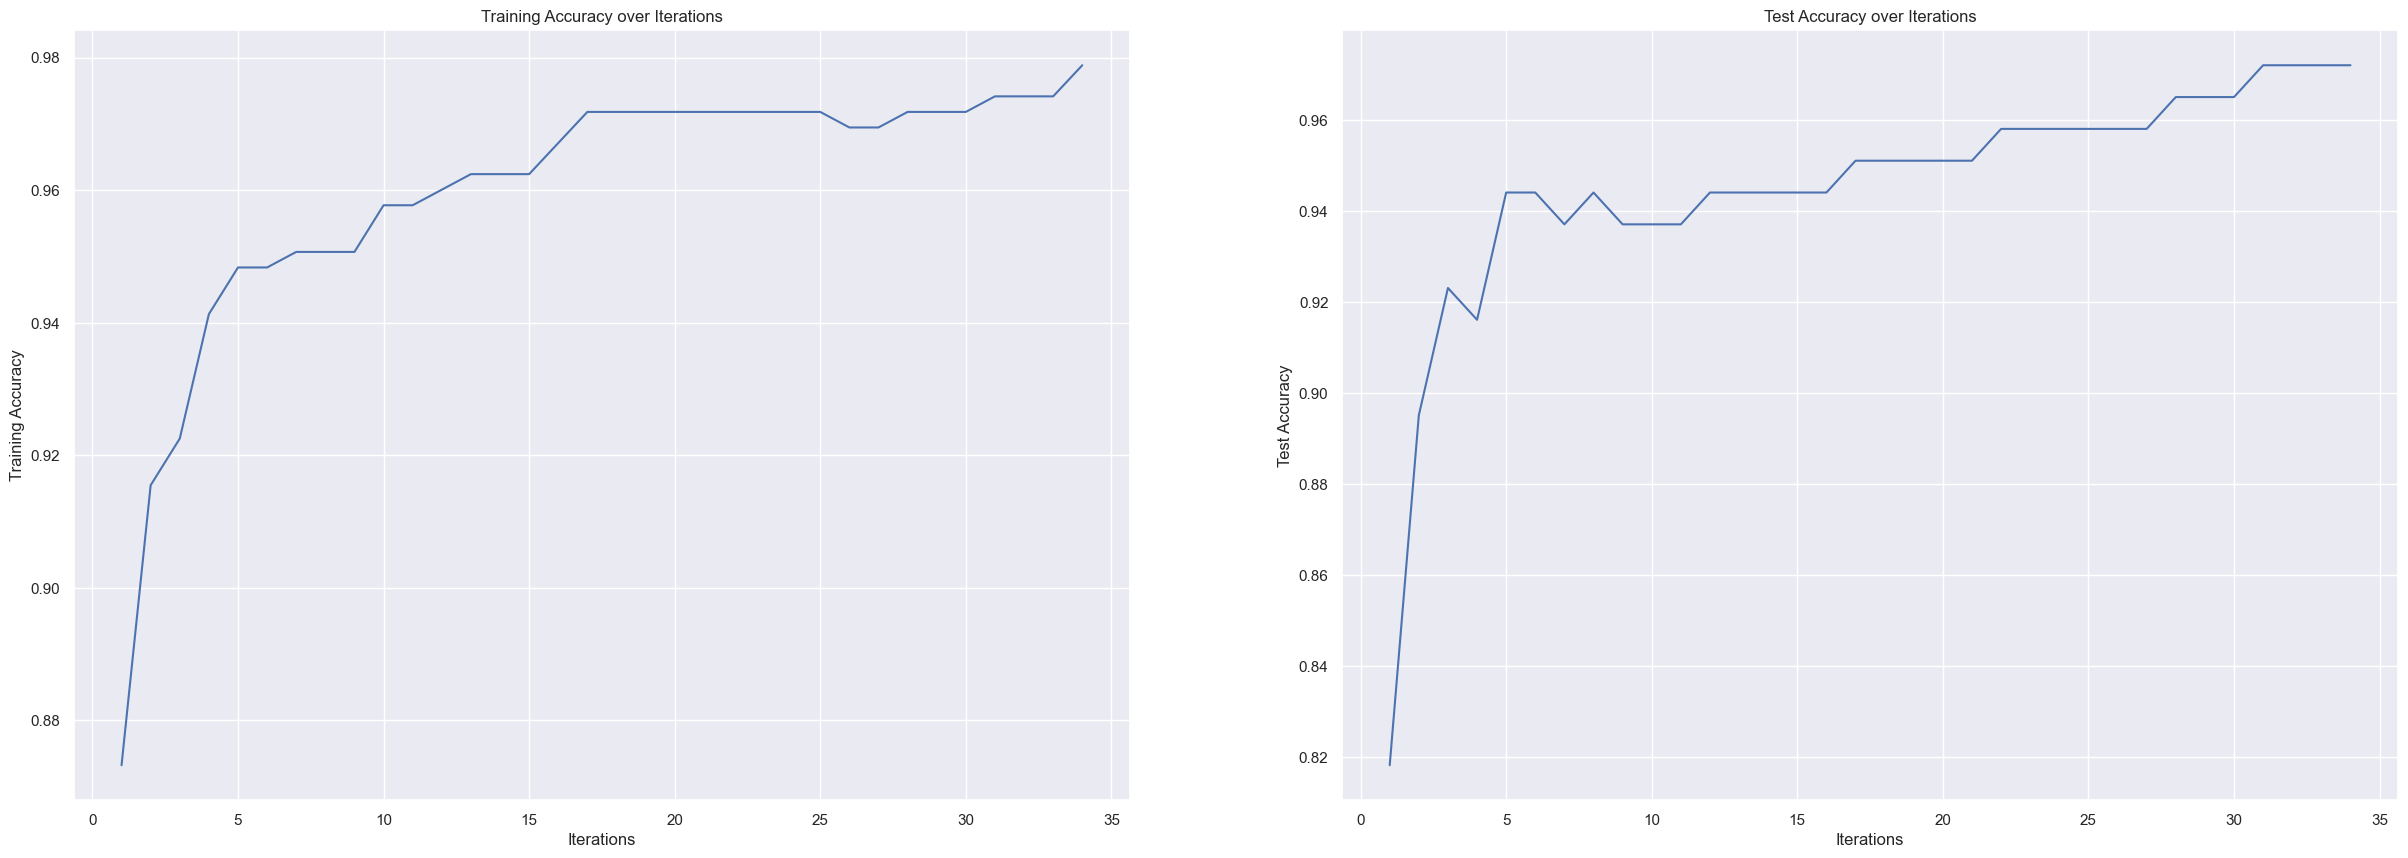

In [41]:
# get the data on mean score over x iterations, then plot training and test accuracy scores.
iterations, training_scores, test_scores = get_score_data(X_train, Y_train, X_test, Y_test, 35, 'tanh')
create_score_plots(iterations, training_scores, test_scores)

It seems the trends of both training and test accuracy carry over from the previous plots. However, the test data doesn't overfit as bad with higher epochs and doesn't actually decrease in accuracy with a very large number of iterations.

The MLP Classifier model from scikit-learn seems to generally do a good job with classifying this data. However, with some overfitting occurring, there is room for improvement. One thing that would help errors in classification is a larger dataset. While this data has 100s of examples, something more in the 1000s would help the classifier learn and avoid overfitting. Additionally, trying different optimizers or activation functions would be beneficial to see if they assist classification. We decided only to showcase two different activation functions and the epoch plots for consideration of space and concision.

# K-Nearest-Neighbors
K-Nearest-Neighbors (KNN) is a lazy machine learning algorithm that classifies by proximity of data points to neighboring data points. The largest factor in a KNN algorithm's accuracy is choosing the correct hyperparameter value of K, that is, how many neighbors is one polling to vote on a test data point. Additionally, KNN can certainly run on our data set with higher dimensions, however, I will only be running it based on 2 features representing size. So summarizing, the high-level goals will be: (A) to find the value of K that (B) best classifies whether the tumors are malignant or benign (C) based on size. 

First, I choose perimeter and area of the tumor as the features to analyze, but leave out radius, for visualization and redundancy reasons. It is much easier to visualize 2-dimensional data rather than 3-dimensional, and both the features perimeter and area are dependent on the radius. The tumors are sphereical in shape and the area formula for a sphere is "area_sphere = 4(pi)(r^2)" while the perimeter formula is "2(pi)(r)," thus both relying on the radius. Additionally, as we've seen in class, data points will become closer as their dimensionality increases. Altohugh this is really only a big problem as we approach dimensionalities in the double and triple digits, working with only 2-dimensional data will rid any bias introduced from this phenomena that could negatively affect accuracy. 

Secondly, I will identify which value of K results in the best accuracy. I do this by running KNN classifiers with a K-value assigned to a variable in the range 1 to A (A being  a pre-specified number, 20 now) 10 times each. Meaning that K=1 will be run 10 times, and its average accuracy stored, then followed by 2, and 3, all the way up to A (currently 20). Then, out of these runs, the K- Value with the highest average accuracy will be stored. 

Lastly, for each "best K-value" found in the previous part, I will run a specified amount of iterations (see epochs variable below, currently 100) with that K-Value. This will take the best K-Value measured over a short period of tests, and continue averaging their accuracies over many tests. I then visualize the data, where the output graphs show which values of K were picked, and their average accuracies over a given amount of iterations (the epoch variable below).

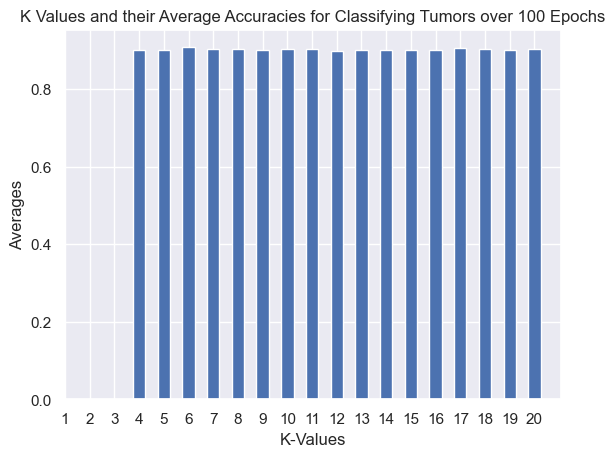

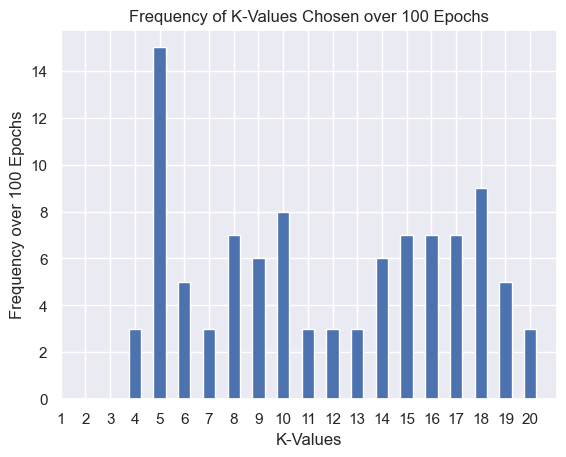

Average Accuracy Rate over All K-Values: 0.9024805423334835


In [11]:
from collections import defaultdict

## Best K-Value Identification ##

#inputs for classifications, examples, range of K_values to test, and Epochs
diagnoses = list(df['diagnosis'])
sizes = merge(list(df_bool['perimeter']), list(df_bool['area']))
range_K_values = 20
epochs = 100

#dictionary to store data in
plot_data = defaultdict(lambda: [])

for i in range(0,epochs):
    #find the best k_val, its corresponding accuracy, and then add it to the data to be visualized
    best_K_val, acc = find_best_K_val(range_K_values, diagnoses, sizes)
    plot_data[best_K_val].append(acc)
    
    #uncomment below if you would like a progress tracker
    #if i % 10 == 0:
        #print("At epoch: {}".format(i))

ks, avgs = mean_dict_of_lists(plot_data)

freqs = []
for k in ks:
    freqs.append(len(plot_data[k]))

plot_bar_graph(ks, avgs, "K Values and their Average Accuracies for Classifying Tumors over {} Epochs".format(epochs), "K-Values", "Averages")
plot_bar_graph(ks, freqs, "Frequency of K-Values Chosen over {} Epochs".format(epochs), "K-Values", "Frequency over {} Epochs".format(epochs))
print("Average Accuracy Rate over All K-Values: {}".format(np.mean(avgs)))


As is shown above, there are a few things that immediately stand out with the results. First is regarding the only hyperparameter, choosing the best k-value. Clearly, in the above example, K=5 is the dominating value... However, this is only slightly a consistent trend. if you were to run this enitre code block multiple times, it would like like the k-values were being picked by a random number generator. You'd run into almost every k-value being chosen with differing frequencies, and almost never a clear winner. With that being said, over the few dozen times I have run this code block above while working on the project, I have noticed that 5 tends to be the general winner, but not clearly enough to be significant. 

With that being said, the results are still increadible with an average accuracy of 90.2%. The reason this is so impressive is because KNN is a lazy classifier, meaning no training necessary. It is by far the quickest and simplest model to implement, and for it to classify correctly 9/10 times means that using this on real world breast cancer data would actually have usable results. If we were to ask this model to classify a new test tumor, we could say with a lot of confidence that the output is correct, which is great for a quick and dirty model like KNN. 

["K-Nearest Neighbors: A Simple Machine Learning Algorithm"](https://rapidminer.com/blog/k-nearest-neighbors-laziest-machine-learning-technique/#:~:text=Why%20is%20the%20k%2Dnearest,any%20calculations%20at%20this%20point.)

# Conclusion

As a recap, we've discussed predicting breast cancer severity using the following classifiers: Bayes, SVM, Single Layer Perceptron, Multilayer Perceptron, and K-Nearest-Neighbors. 

Regarding the Bayes classifier application, we concluded that we should not use it due to our inability to know the distribution of our data in addition to the incorrect assumption that our data features are independent.

During our class presentation, we presented that our application of a linear support vector machine reached an accuracy rate of 93.7%. However, it was pointed out to us that we could improve this if we implemented one of a variety of kernals to help reduce the dimensionality of our data. As discussed in the SVM section, the addition of the Gaussian kernal (aka radial basis function, or RBF) increased the SVM perfomance the best, resulting in about a a 94% accuracy, just a tad bit higher than the previous 93.7%.

Using the Single Layer Perceptron, we were able to achieve a testing accuracy of approximately 91.6% over 10,000 iterations. This figure is impressive, however, it is also a bit disapointing. It only does 1.4% better than our K-Nearest-Neighbors classifier, which has a much lazier implementation that the rigorous training of the perceptron. If we are going to go through the trouble of training something as complex as the preceptron, we'd like to see slightly higher results than a lazy ML algorithm...

Enter: Multi-Layer Perceptron. After only 5-10 iterations of this classifier, it was easily getting over 95% test accuracy, which is better than all other models we've attempted so far. Although we were approaching a danger zone regarding over fitting, we believe that getting our hands on more examples to train the MLP would allow for an continued high test accuracy while mitigating the risk of overfitting.

Lastly, we wanted to see how all the above classifiers shaped up against the infamous, lazy machine learning model, KNN. Are any of the ML models discussed actually worth the hassle if KNN can do the same job with much less work. Well, it turns out that every single ML model has a better average performance than KNN, which comes in at approximately 90.2% accuracy. Additionally, we are having slight troubles finding a good and repeatable value of K, which suggests that it may not be the best classifier for this dataset in general. 

Overall, the Multi-Layer Perceptron was the most successful at classifying this breast cancer dataset by severity. We believe that, while there may be a slight danger of overfitting within this model and others, the dataset has 596 examples in it, which is enough to show that our models are locking onto and learning an existing trend to produce their accuracies. We agree that introducing more data points to our models would only solidify which model is the most accurate on average, but we also agree that we believe MLP will rise above all the others if this research were continued. 